# Dataframes:
1. Cumulative_wnv: All year counts are aggregated, with columns for N_WNV, NN_WNV, and total
2. All_wnv: All year counts remain in distinct rows ready for extraction as needed, with columns for N_WNV, NN_WNV, and total

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import ggplot
import geopandas as gpd
import geodatasets
import shapely
from geopandas import GeoSeries, GeoDataFrame
from shapely.geometry import Point, LineString, Polygon
import folium
#import Fiona
import pyproj
import rtree
import plotly.express as px
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import json
from shapely.geometry import box
import math
#import geoplot as gplt

In [2]:
#read in non-neuroinvasive WNV data
nn_wnv = pd.read_csv(r"C:\Users\amooney\ORISE\USDA\Python\human_nonneuroinvasive_wnv_1999-2020.csv") 

In [3]:
MS_nnwnv=nn_wnv.loc[nn_wnv['State']=='MS']

In [4]:
MS_nnwnv.shape

(278, 5)

In [5]:
TX_nnwnv=nn_wnv.loc[nn_wnv['State']=='TX']

In [6]:
KS_nnwnv=nn_wnv.loc[nn_wnv['State']=='KS']

In [7]:
OK_nnwnv=nn_wnv.loc[nn_wnv['State']=='OK']

In [8]:
AR_nnwnv=nn_wnv.loc[nn_wnv['State']=='AR']

In [9]:
LA_nnwnv=nn_wnv.loc[nn_wnv['State']=='LA']

In [10]:
pieces = (MS_nnwnv, TX_nnwnv, KS_nnwnv, OK_nnwnv, AR_nnwnv, LA_nnwnv)

In [11]:
South_nnwnv = pd.concat(pieces, ignore_index = True)

In [12]:
South_nnwnv.head()

State        County  fipscode  Year  COUNT
0    MS  Adams County     28001  2002      1
1    MS  Adams County     28001  2004      1
2    MS  Adams County     28001  2005      1
3    MS  Adams County     28001  2006      1
4    MS  Adams County     28001  2007      4

In [13]:
South_nnwnv.rename(columns={'fipscode': 'fips'}, inplace=True)

In [14]:
Cumulative_nnwnv = South_nnwnv.groupby(['fips']).agg({'COUNT':sum, 'State':'max','County':'max' })

In [15]:
Cumulative_nnwnv=Cumulative_nnwnv.reset_index()

In [16]:
#read in neuroinvasive WNV data
n_wnv = pd.read_csv(r"C:\Users\amooney\ORISE\USDA\Python\human_neuroinvasive_wnv_2000-2021.csv")

In [17]:
MS_nwnv=n_wnv.loc[n_wnv['state']=='Mississippi']
TX_nwnv=n_wnv.loc[n_wnv['state']=='Texas']
KS_nwnv=n_wnv.loc[n_wnv['state']=='Kansas']
OK_nwnv=n_wnv.loc[n_wnv['state']=='Oklahoma']
AR_nwnv=n_wnv.loc[n_wnv['state']=='Arkansas']
LA_nwnv=n_wnv.loc[n_wnv['state']=='Louisiana']

In [18]:
pieces = (MS_nwnv, TX_nwnv, KS_nwnv, OK_nwnv, AR_nwnv, LA_nwnv)
South_nwnv = pd.concat(pieces, ignore_index = True)

In [19]:
South_nwnv.head()

fips county        state           location  year  count
0  28001  Adams  Mississippi  Mississippi-Adams  2000      0
1  28001  Adams  Mississippi  Mississippi-Adams  2001      0
2  28001  Adams  Mississippi  Mississippi-Adams  2002      4
3  28001  Adams  Mississippi  Mississippi-Adams  2003      0
4  28001  Adams  Mississippi  Mississippi-Adams  2004      1

In [20]:
Cumulative_nwnv = South_nwnv.groupby(['fips']).agg({'count':sum, 'state':'max','county':'max' })
Cumulative_nwnv=Cumulative_nwnv.reset_index()

In [21]:
#read in non-neuroinvasive WNV data
counties= gpd.read_file(r"C:\Users\amooney\ORISE\USDA\Python\Ambers_Work\counties.shp") 

In [22]:
target_crs=counties.crs

In [23]:
counties.head()

OBJECTID STATE COUNTY        NAME  STCO_FIPS STATE_NAME  STCODE  CTYCODE  \
0        5    04    003     Cochise       4003    Arizona       4        3   
1        6    04    009      Graham       4009    Arizona       4        9   
2        7    04    012      La Paz       4012    Arizona       4       12   
3        8    04    015      Mohave       4015    Arizona       4       15   
4        9    04    023  Santa Cruz       4023    Arizona       4       23   

                                            geometry  
0  POLYGON ((-1216673.866 -483827.675, -1221881.8...  
1  POLYGON ((-1286073.233 -344171.971, -1282424.1...  
2  POLYGON ((-1708152.738 -333476.498, -1708432.6...  
3  POLYGON ((-1581791.428 94690.230, -1574466.351...  
4  POLYGON ((-1426763.630 -543402.233, -1424882.7...

In [24]:
MS=counties.loc[counties['STATE_NAME']=='Mississippi']
TX=counties.loc[counties['STATE_NAME']=='Texas']
KS=counties.loc[counties['STATE_NAME']=='Kansas']
OK=counties.loc[counties['STATE_NAME']=='Oklahoma']
AR=counties.loc[counties['STATE_NAME']=='Arkansas']
LA=counties.loc[counties['STATE_NAME']=='Louisiana']

In [25]:
pieces = (MS, TX, KS, OK, AR, LA)
South = pd.concat(pieces, ignore_index = True)

In [26]:
South.head()

OBJECTID STATE COUNTY       NAME  STCO_FIPS   STATE_NAME  STCODE  CTYCODE  \
0      396    28    003     Alcorn      28003  Mississippi      28        3   
1      397    28    007     Attala      28007  Mississippi      28        7   
2      398    28    013    Calhoun      28013  Mississippi      28       13   
3      399    28    023     Clarke      28023  Mississippi      28       23   
4      400    28    031  Covington      28031  Mississippi      28       31   

                                            geometry  
0  POLYGON ((652348.953 -255746.896, 680927.531 -...  
1  POLYGON ((620467.812 -489300.992, 606178.570 -...  
2  POLYGON ((627953.225 -360849.197, 630182.428 -...  
3  POLYGON ((667538.914 -609405.176, 663920.716 -...  
4  POLYGON ((621636.284 -616042.939, 622556.378 -...

In [27]:
South_nwnv.head()

fips county        state           location  year  count
0  28001  Adams  Mississippi  Mississippi-Adams  2000      0
1  28001  Adams  Mississippi  Mississippi-Adams  2001      0
2  28001  Adams  Mississippi  Mississippi-Adams  2002      4
3  28001  Adams  Mississippi  Mississippi-Adams  2003      0
4  28001  Adams  Mississippi  Mississippi-Adams  2004      1

In [28]:
South_nnwnv.head()

State        County   fips  Year  COUNT
0    MS  Adams County  28001  2002      1
1    MS  Adams County  28001  2004      1
2    MS  Adams County  28001  2005      1
3    MS  Adams County  28001  2006      1
4    MS  Adams County  28001  2007      4

In [29]:
South.rename(columns={'STCO_FIPS': 'fips'}, inplace=True)

In [30]:
South_nnwnv.rename(columns={'Year': 'year'}, inplace=True)

In [31]:
Cumulative_nwnv.head()

fips  count     state    county
0  5001      4  Arkansas  Arkansas
1  5003      2  Arkansas    Ashley
2  5005      0  Arkansas    Baxter
3  5007      7  Arkansas    Benton
4  5009      1  Arkansas     Boone

In [32]:
Cumulative_nnwnv.head()

fips  COUNT State          County
0  5003      2    AR   Ashley County
1  5007      1    AR   Benton County
2  5009      1    AR    Boone County
3  5011      4    AR  Bradley County
4  5019      3    AR    Clark County

In [33]:
Cumulative_nnwnv.rename(columns={'COUNT': 'count_nn'}, inplace=True)

In [34]:
Cumulative_nwnv.rename(columns={'count': 'count_n'}, inplace=True)

In [35]:
Cumulative_wnv=Cumulative_nwnv.merge(Cumulative_nnwnv, how='left')

In [36]:
Cumulative_wnv.head()

fips  count_n     state    county  count_nn State         County
0  5001        4  Arkansas  Arkansas       NaN   NaN            NaN
1  5003        2  Arkansas    Ashley       2.0    AR  Ashley County
2  5005        0  Arkansas    Baxter       NaN   NaN            NaN
3  5007        7  Arkansas    Benton       1.0    AR  Benton County
4  5009        1  Arkansas     Boone       1.0    AR   Boone County

In [37]:
Cumulative_wnv=Cumulative_wnv.drop(columns=['State', 'County'])

In [38]:
nan_rows2 = Cumulative_wnv.isna().any(axis=1)

In [39]:
nan_idx2=[]
for i in range(nan_rows2.shape[0]):
    if nan_rows2[i]==True:
        nan_idx2.append(i)
        

In [40]:
Cumulative_wnv=Cumulative_wnv.fillna(0)

In [41]:
Cumulative_wnv.head()

fips  count_n     state    county  count_nn
0  5001        4  Arkansas  Arkansas       0.0
1  5003        2  Arkansas    Ashley       2.0
2  5005        0  Arkansas    Baxter       0.0
3  5007        7  Arkansas    Benton       1.0
4  5009        1  Arkansas     Boone       1.0

In [42]:
Cumulative_wnv['Total'] = Cumulative_wnv['count_n'] + Cumulative_wnv['count_nn']

In [43]:
All_wnv=South_nwnv.merge(South_nnwnv, how='left')

In [44]:
All_wnv.shape

(14454, 9)

In [45]:
South_nwnv.shape

(14454, 6)

In [46]:
All_wnv=All_wnv.drop(columns=['State', 'County'])

In [47]:
nan_rows = All_wnv.isna().any(axis=1)

In [48]:
nan_rows.shape[0]

14454

In [49]:
nan_rows[0]

True

In [50]:
nan_rows[0] == True

True

In [51]:
nan_idx=[]
for i in range(nan_rows.shape[0]):
    if nan_rows[i]==True:
        nan_idx.append(i)
        

In [52]:
All_wnv=All_wnv.fillna(0)

In [53]:
All_wnv.head()

fips county        state           location  year  count  COUNT
0  28001  Adams  Mississippi  Mississippi-Adams  2000      0    0.0
1  28001  Adams  Mississippi  Mississippi-Adams  2001      0    0.0
2  28001  Adams  Mississippi  Mississippi-Adams  2002      4    1.0
3  28001  Adams  Mississippi  Mississippi-Adams  2003      0    0.0
4  28001  Adams  Mississippi  Mississippi-Adams  2004      1    1.0

In [54]:
All_wnv.rename(columns={'COUNT': 'Count_nn'}, inplace=True)

In [55]:
All_wnv.rename(columns={'count': 'Count_n'}, inplace=True)

In [56]:
All_wnv['Total'] = All_wnv['Count_n'] + All_wnv['Count_nn']

In [57]:
All_wnv.head()

fips county        state           location  year  Count_n  Count_nn  \
0  28001  Adams  Mississippi  Mississippi-Adams  2000        0       0.0   
1  28001  Adams  Mississippi  Mississippi-Adams  2001        0       0.0   
2  28001  Adams  Mississippi  Mississippi-Adams  2002        4       1.0   
3  28001  Adams  Mississippi  Mississippi-Adams  2003        0       0.0   
4  28001  Adams  Mississippi  Mississippi-Adams  2004        1       1.0   

   Total  
0    0.0  
1    0.0  
2    5.0  
3    0.0  
4    2.0

In [58]:
base=South.merge(Cumulative_wnv, how='left')

In [59]:
base.head()

OBJECTID STATE COUNTY       NAME   fips   STATE_NAME  STCODE  CTYCODE  \
0      396    28    003     Alcorn  28003  Mississippi      28        3   
1      397    28    007     Attala  28007  Mississippi      28        7   
2      398    28    013    Calhoun  28013  Mississippi      28       13   
3      399    28    023     Clarke  28023  Mississippi      28       23   
4      400    28    031  Covington  28031  Mississippi      28       31   

                                            geometry  count_n        state  \
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  Mississippi   
1  POLYGON ((620467.812 -489300.992, 606178.570 -...        5  Mississippi   
2  POLYGON ((627953.225 -360849.197, 630182.428 -...        9  Mississippi   
3  POLYGON ((667538.914 -609405.176, 663920.716 -...        5  Mississippi   
4  POLYGON ((621636.284 -616042.939, 622556.378 -...        3  Mississippi   

      county  count_nn  Total  
0     Alcorn       0.0    2.0  
1     Attala       2.0    7.0  
2    Calhoun       9.0   18.0  
3     Clarke       0.0    5.0  
4  Covington       4.0    7.0

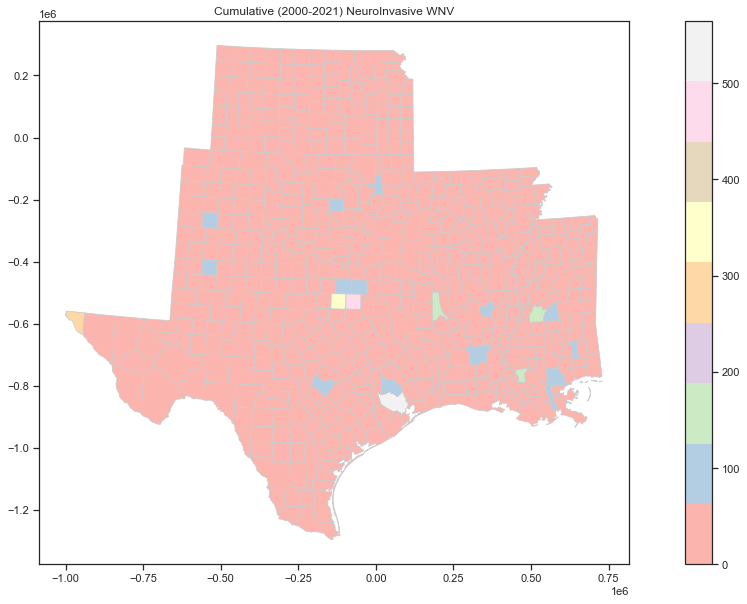

In [60]:
fig, ax = plt.subplots(figsize=(20, 10))
base.plot(column='count_n', cmap='Pastel1', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
                  
                  #legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})
ax.set_title('Cumulative (2000-2021) NeuroInvasive WNV' )
plt.show()

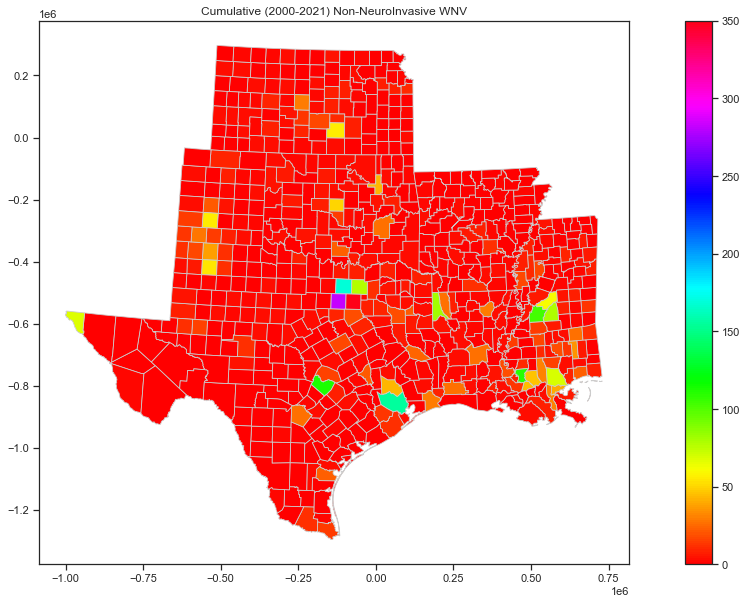

In [61]:
fig, ax = plt.subplots(figsize=(20, 10))
base.plot(column='count_nn', cmap='hsv', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
                  
                  #legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})
ax.set_title('Cumulative (2000-2021) Non-NeuroInvasive WNV' )
plt.show()

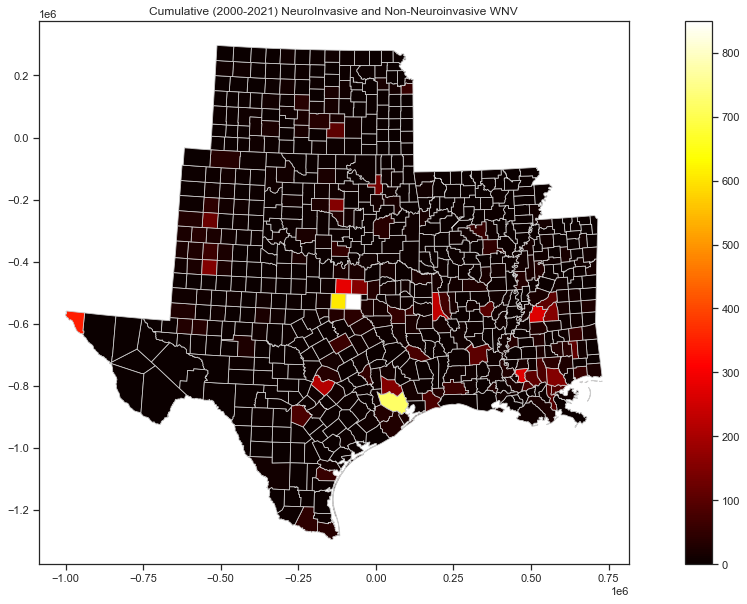

In [62]:
fig, ax = plt.subplots(figsize=(20, 10))
base.plot(column='Total', cmap='hot', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
                  
                  #legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})
ax.set_title('Cumulative (2000-2021) NeuroInvasive and Non-Neuroinvasive WNV' )
plt.show()

In [63]:
base.total_bounds

array([-1000349.7549, -1295866.6609,   729724.3096,   296835.7809])

In [64]:
def create_grid(gdf=None, bounds=None, n_cells=10, overlap=False, crs="EPSG:29902"):

    import geopandas as gpd
    import shapely

    if bounds != None:
        xmin, ymin, xmax, ymax= bounds
    else:
        xmin, ymin, xmax, ymax= gdf.total_bounds

    # get cell size
    cell_size = (xmax-xmin)/n_cells
    # create the cells in a loop
    grid_cells = []
    for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
        for y0 in np.arange(ymin, ymax+cell_size, cell_size):
            x1 = x0-cell_size
            y1 = y0+cell_size
            poly = shapely.geometry.box(x0, y0, x1, y1)
            #print (gdf.overlay(poly, how='intersection'))
            grid_cells.append( poly )

    cells = gpd.GeoDataFrame(grid_cells, columns=['geometry'],
                                     crs=crs)
    if overlap == True:
        cols = ['grid_id','geometry','grid_area']
        cells = cells.sjoin(gdf, how='inner').drop_duplicates('geometry')
    return cells

In [65]:
def create_hex_grid(gdf=None, bounds=None, n_cells=10, overlap=False, crs="EPSG:29902"):


    from shapely.geometry import Polygon
    import geopandas as gpd
    if bounds != None:
        xmin, ymin, xmax, ymax= bounds
    else:
        xmin, ymin, xmax, ymax= gdf.total_bounds

    unit = (xmax-xmin)/n_cells
    a = np.sin(np.pi / 3)
    cols = np.arange(np.floor(xmin), np.ceil(xmax), 3 * unit)
    rows = np.arange(np.floor(ymin) / a, np.ceil(ymax) / a, unit)

    #print (len(cols))
    hexagons = []
    for x in cols:
      for i, y in enumerate(rows):
        if (i % 2 == 0):
          x0 = x
        else:
          x0 = x + 1.5 * unit

        hexagons.append(Polygon([
          (x0, y * a),
          (x0 + unit, y * a),
          (x0 + (1.5 * unit), (y + unit) * a),
          (x0 + unit, (y + (2 * unit)) * a),
          (x0, (y + (2 * unit)) * a),
          (x0 - (0.5 * unit), (y + unit) * a),
        ]))

    grid = gpd.GeoDataFrame({'geometry': hexagons},crs=crs)
    grid["grid_area"] = grid.area
    grid = grid.reset_index().rename(columns={"index": "grid_id"})
    if overlap == True:
        cols = ['grid_id','geometry','grid_area']
        grid = grid.sjoin(gdf, how='inner').drop_duplicates('geometry')
    return grid

In [66]:
grid=create_grid(gdf=base, bounds=None, n_cells=10, overlap=True, crs="ESRI:102003")

In [67]:
type(grid)

geopandas.geodataframe.GeoDataFrame

In [68]:
grid.tail()

geometry  index_right OBJECTID  \
112  POLYGON ((556716.903 -949851.848, 556716.903 -...          631     1661   
113  POLYGON ((556716.903 -776844.442, 556716.903 -...          652     1740   
114  POLYGON ((556716.903 -603837.035, 556716.903 -...           68     2591   
115  POLYGON ((556716.903 -430829.629, 556716.903 -...           34     1597   
116  POLYGON ((556716.903 -257822.222, 556716.903 -...          587     1037   

    STATE COUNTY         NAME   fips   STATE_NAME  STCODE  CTYCODE  count_n  \
112    22    057    Lafourche  22057    Louisiana      22       57       13   
113    22    103  St. Tammany  22103    Louisiana      22      103       84   
114    28    127      Simpson  28127  Mississippi      28      127        4   
115    28    015      Carroll  28015  Mississippi      28       15        0   
116    05    093  Mississippi   5093     Arkansas       5       93        1   

           state       county  count_nn  Total  
112    Louisiana    Lafourche       7.0   20.0  
113    Louisiana  St. Tammany      69.0  153.0  
114  Mississippi      Simpson       6.0   10.0  
115  Mississippi      Carroll       1.0    1.0  
116     Arkansas  Mississippi       1.0    2.0

(-1121455.1845150003,
 908498.3844983373,
 -1378272.844965708,
 434655.74427986646)

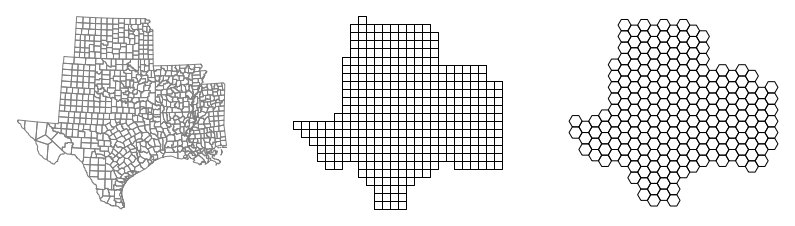

In [69]:
fig,ax = plt.subplots(1,3,figsize=(14,7))
axs=ax.flat
base.plot(ec='gray',fc="none",figsize=(10,10),ax=axs[0])
gr = create_grid(base, n_cells=25, overlap=True, crs="ESRI:102003")
gr.plot(fc="none", ec='black',ax=axs[1])
hexgr = create_hex_grid(base, n_cells=30, overlap=True, crs="ESRI:102003")
hexgr.plot(fc="none", ec='black',ax=axs[2])
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

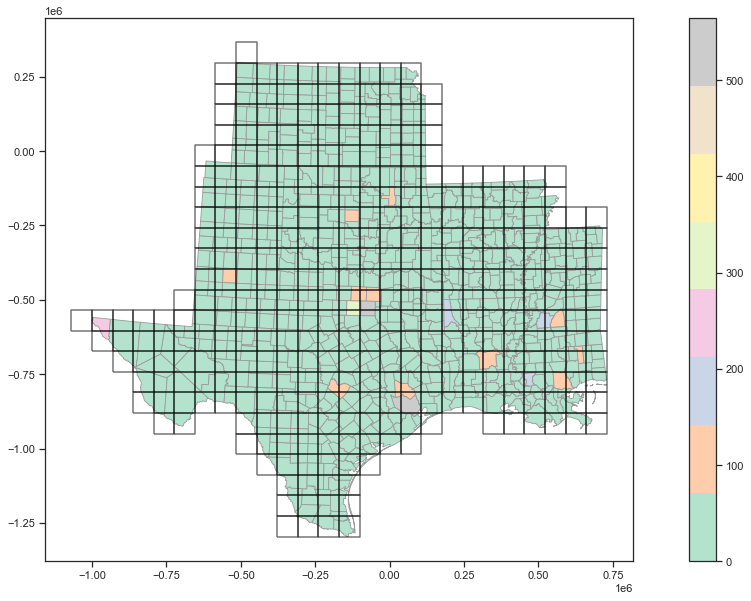

In [70]:
fig, ax = plt.subplots(figsize=(20, 10))
base.plot(column='count_n', cmap='Pastel2', linewidth=0.8, ax=ax, edgecolor='0.6', legend=True)
                  
                  #legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})
#ax.set_title('Cumulative (2000-2021) NeuroInvasive WNV' )
gr = create_grid(base, n_cells=25, overlap=True, crs="ESRI:102003")
gr.plot(ax=ax, color = 'none',linewidth=1.5, edgecolor = 'black', alpha = 0.55)
plt.show()

In [64]:
states= gpd.read_file(r"C:\Users\amooney\ORISE\USDA\Python\Ambers_Work\US_State_Boundaries.shp") 

In [65]:
states.head()

FID  OBJECTID      NAME STATE_ABBR STATE_FIPS  ORDER_ADM MONTH_ADM  \
0    1         1  Arkansas         AR         05         25      June   
1    2         2   Arizona         AZ         04         48  February   
2    3         3  Colorado         CO         08         38    August   
3    4         4      Iowa         IA         19         29  December   
4    5         5  Illinois         IL         17         21  December   

   DAY_ADM  YEAR_ADM  TYPE       POP  SQ_MILES  PRIM_MILES  Shape_Leng  \
0       15      1836  Land   2915918   53181.2      1329.6   21.737082   
1       14      1912  Land   6392017  113990.1      1487.7   23.889715   
2        1      1876  Land   5029196  104092.0      1304.6   22.017104   
3       28      1846  Land   3046355   56268.6      1127.3   20.132064   
4        3      1818  Land  12830632   56339.8      1318.5   21.660211   

   Shape__Are  Shape__Len                                           geometry  
0   13.586155   21.737082  POLYGON ((-94.29160 36.49930, -94.28957 36.499...  
1   28.919145   23.889715  POLYGON ((-110.49382 37.00377, -110.49091 37.0...  
2   28.038998   22.017104  POLYGON ((-106.37558 41.00072, -106.35240 40.9...  
3   15.856457   20.132064  POLYGON ((-91.24677 43.50082, -91.22239 43.500...  
4   15.408477   21.660211  POLYGON ((-90.43711 42.50713, -90.42638 42.507...

In [66]:
MS_state=states.loc[states['NAME']=='Mississippi']
TX_state=states.loc[states['NAME']=='Texas']
KS_state=states.loc[states['NAME']=='Kansas']
OK_state=states.loc[states['NAME']=='Oklahoma']
AR_state=states.loc[states['NAME']=='Arkansas']
LA_state=states.loc[states['NAME']=='Louisiana']

In [67]:
pieces = (MS_state, TX_state, KS_state, OK_state, AR_state, LA_state)
South_States = pd.concat(pieces, ignore_index = True)

In [68]:
type(South_States)

geopandas.geodataframe.GeoDataFrame

In [69]:
South_States=South_States.to_crs("ESRI:102003")

In [70]:
South_States.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: USA_Contiguous_Albers_Equal_Area_Conic
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

NameError: name 'create_grid' is not defined

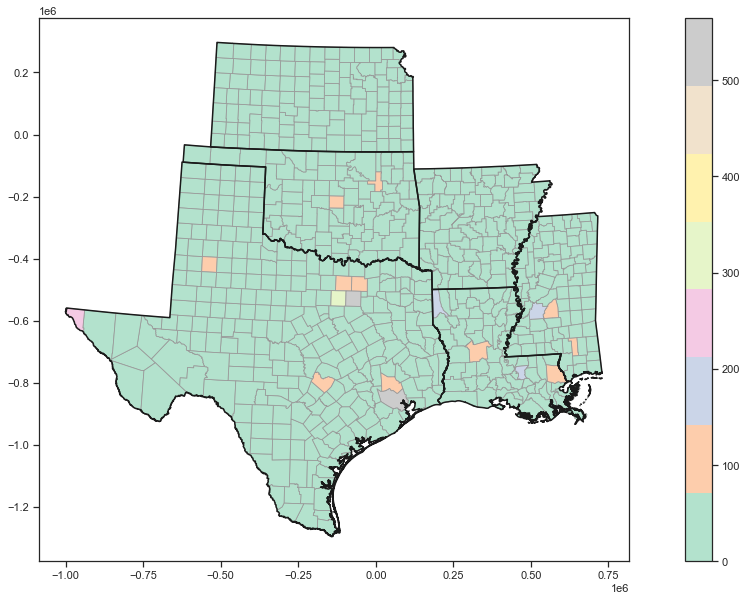

In [71]:
fig, ax = plt.subplots(figsize=(20, 10))
base.plot(column='count_n', cmap='Pastel2', linewidth=0.8, ax=ax, edgecolor='0.6', legend=True)
South_States.plot(ax=ax, color='none', linewidth=1.5, edgecolor='0.1', legend=True)
#ax.set_title('Cumulative (2000-2021) NeuroInvasive WNV' )
gr = create_grid(base, n_cells=25, overlap=True, crs="ESRI:102003")
gr.plot(ax=ax, color = 'none',linewidth=1.5, edgecolor = 'black', alpha = 0.55)

plt.show()

In [79]:
gr.rename(columns={'index_right': 'idx_r'}, inplace=True)

In [80]:
# Perform spatial join, merging attribute table of WNV count and that of the cell with which it intersects
# op = "intersects" also counts those that fall on a cell boundary (between two cells)
# op = "within" will not count those fall on a cell boundary
wnv_cell = gpd.sjoin(counties, gr, how = "inner", op = "intersects")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.


In [81]:
wnv_cell.head(10)

OBJECTID_left STATE_left COUNTY_left  NAME_left  STCO_FIPS  \
5              10         05         005     Baxter       5005   
20             25         05         129     Searcy       5129   
64             69         05         141  Van Buren       5141   
927           949         05         009      Boone       5009   
944           991         05         101     Newton       5101   
988          1035         05         089     Marion       5089   
5              10         05         005     Baxter       5005   
20             25         05         129     Searcy       5129   
21             26         05         135      Sharp       5135   
64             69         05         141  Van Buren       5141   

    STATE_NAME_left  STCODE_left  CTYCODE_left  \
5          Arkansas            5             5   
20         Arkansas            5           129   
64         Arkansas            5           141   
927        Arkansas            5             9   
944        Arkansas            5           101   
988        Arkansas            5            89   
5          Arkansas            5             5   
20         Arkansas            5           129   
21         Arkansas            5           135   
64         Arkansas            5           141   

                                              geometry  index_right  ...  \
5    POLYGON ((307977.162 -106578.795, 309066.847 -...          491  ...   
20   POLYGON ((320367.728 -164706.808, 320944.333 -...          491  ...   
64   POLYGON ((316888.726 -232893.391, 316875.445 -...          491  ...   
927  POLYGON ((264993.463 -108093.355, 275586.492 -...          491  ...   
944  POLYGON ((254194.108 -194619.341, 251001.302 -...          491  ...   
988  POLYGON ((304864.651 -106733.294, 307977.162 -...          491  ...   
5    POLYGON ((307977.162 -106578.795, 309066.847 -...          516  ...   
20   POLYGON ((320367.728 -164706.808, 320944.333 -...          516  ...   
21   POLYGON ((403671.019 -102655.479, 404001.329 -...          516  ...   
64   POLYGON ((316888.726 -232893.391, 316875.445 -...          516  ...   

     NAME_right  fips STATE_NAME_right STCODE_right CTYCODE_right  count_n  \
5        Newton  5101         Arkansas            5           101        0   
20       Newton  5101         Arkansas            5           101        0   
64       Newton  5101         Arkansas            5           101        0   
927      Newton  5101         Arkansas            5           101        0   
944      Newton  5101         Arkansas            5           101        0   
988      Newton  5101         Arkansas            5           101        0   
5     Van Buren  5141         Arkansas            5           141        0   
20    Van Buren  5141         Arkansas            5           141        0   
21    Van Buren  5141         Arkansas            5           141        0   
64    Van Buren  5141         Arkansas            5           141        0   

        state     county  count_nn  Total  
5    Arkansas     Newton       0.0    0.0  
20   Arkansas     Newton       0.0    0.0  
64   Arkansas     Newton       0.0    0.0  
927  Arkansas     Newton       0.0    0.0  
944  Arkansas     Newton       0.0    0.0  
988  Arkansas     Newton       0.0    0.0  
5    Arkansas  Van Buren       0.0    0.0  
20   Arkansas  Van Buren       0.0    0.0  
21   Arkansas  Van Buren       0.0    0.0  
64   Arkansas  Van Buren       0.0    0.0  

[10 rows x 24 columns]

In [71]:
def create_grid2(feature, shape, side_length):
    '''Create a grid consisting of either rectangles or hexagons with a specified side length that covers the extent of input feature.'''

    # Slightly displace the minimum and maximum values of the feature extent by creating a buffer
    # This decreases likelihood that a feature will fall directly on a cell boundary (in between two cells)
    # Buffer is projection dependent (due to units)
    feature = feature.buffer(20)

    # Get extent of buffered input feature
    min_x, min_y, max_x, max_y = feature.total_bounds


    # Create empty list to hold individual cells that will make up the grid
    cells_list = []

    # Create grid of squares if specified
    if shape in ["square", "rectangle", "box"]:

        # Adapted from https://james-brennan.github.io/posts/fast_gridding_geopandas/
        # Create and iterate through list of x values that will define column positions with specified side length
        for x in np.arange(min_x - side_length, max_x + side_length, side_length):

            # Create and iterate through list of y values that will define row positions with specified side length
            for y in np.arange(min_y - side_length, max_y + side_length, side_length):

                # Create a box with specified side length and append to list
                cells_list.append(box(x, y, x + side_length, y + side_length))


    # Otherwise, create grid of hexagons
    elif shape == "hexagon":

        # Set horizontal displacement that will define column positions with specified side length (based on normal hexagon)
        x_step = 1.5 * side_length

        # Set vertical displacement that will define row positions with specified side length (based on normal hexagon)
        # This is the distance between the centers of two hexagons stacked on top of each other (vertically)
        y_step = math.sqrt(3) * side_length

        # Get apothem (distance between center and midpoint of a side, based on normal hexagon)
        apothem = (math.sqrt(3) * side_length / 2)

        # Set column number
        column_number = 0

        # Create and iterate through list of x values that will define column positions with vertical displacement
        for x in np.arange(min_x, max_x + x_step, x_step):

            # Create and iterate through list of y values that will define column positions with horizontal displacement
            for y in np.arange(min_y, max_y + y_step, y_step):

                # Create hexagon with specified side length
                hexagon = [[x + math.cos(math.radians(angle)) * side_length, y + math.sin(math.radians(angle)) * side_length] for angle in range(0, 360, 60)]

                # Append hexagon to list
                cells_list.append(Polygon(hexagon))

            # Check if column number is even
            if column_number % 2 == 0:

                # If even, expand minimum and maximum y values by apothem value to vertically displace next row
                # Expand values so as to not miss any features near the feature extent
                min_y -= apothem
                max_y += apothem

            # Else, odd
            else:

                # Revert minimum and maximum y values back to original
                min_y += apothem
                max_y -= apothem

            # Increase column number by 1
            column_number += 1

    # Else, raise error
    else:
        raise Exception("Specify a rectangle or hexagon as the grid shape.")

    # Create grid from list of cells
    grid = gpd.GeoDataFrame(cells_list, columns = ['geometry'], crs = proj)

    # Create a column that assigns each grid a number
    grid["Grid_ID"] = np.arange(len(grid))

    # Return grid
    return grid

In [72]:
# Set side length for cells in grid
# This is dependent on projection chosen as length is in units specified in projection
side_length = 30000

# Set shape of grid
shape = "hexagon"
# shape = "rectangle"

proj="ESRI:102003"

In [73]:
# Create grid
south_grid = create_grid2(feature = base, shape = shape, side_length = side_length)

In [74]:
#Create rectangular grid
south_grid2 = create_grid2(feature=base, shape='square', side_length=side_length)

In [75]:
south_grid.head()

geometry  Grid_ID
0  POLYGON ((-970369.736 -1295886.647, -985369.73...        0
1  POLYGON ((-970369.736 -1243925.122, -985369.73...        1
2  POLYGON ((-970369.736 -1191963.598, -985369.73...        2
3  POLYGON ((-970369.736 -1140002.074, -985369.73...        3
4  POLYGON ((-970369.736 -1088040.550, -985369.73...        4

In [76]:
south_grid2

geometry  Grid_ID
0     POLYGON ((-1000369.736 -1325886.647, -1000369....        0
1     POLYGON ((-1000369.736 -1295886.647, -1000369....        1
2     POLYGON ((-1000369.736 -1265886.647, -1000369....        2
3     POLYGON ((-1000369.736 -1235886.647, -1000369....        3
4     POLYGON ((-1000369.736 -1205886.647, -1000369....        4
...                                                 ...      ...
3355  POLYGON ((769630.264 204113.353, 769630.264 23...     3355
3356  POLYGON ((769630.264 234113.353, 769630.264 26...     3356
3357  POLYGON ((769630.264 264113.353, 769630.264 29...     3357
3358  POLYGON ((769630.264 294113.353, 769630.264 32...     3358
3359  POLYGON ((769630.264 324113.353, 769630.264 35...     3359

[3360 rows x 2 columns]

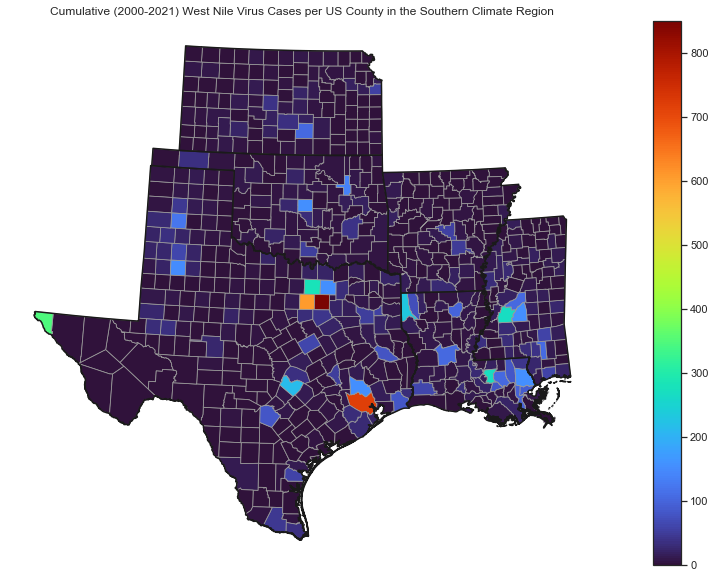

In [77]:
fig, ax = plt.subplots(figsize=(20, 10))
base.plot(column='Total', cmap='turbo', linewidth=0.8, ax=ax, edgecolor='0.6', legend=True)
South_States.plot(ax=ax, color='none', linewidth=1.5, edgecolor='0.1', legend=True)
ax.set_title('Cumulative (2000-2021) West Nile Virus Cases per US County in the Southern Climate Region' )
#south_grid.plot(ax=ax, color = 'none',linewidth=.75, edgecolor = 'lightseagreen', alpha = 0.55)
plt.axis('off')

plt.show()

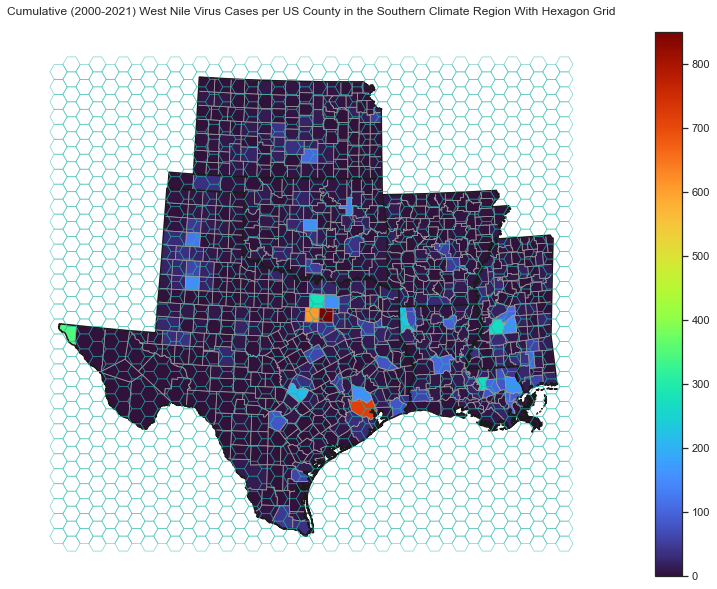

In [78]:
fig, ax = plt.subplots(figsize=(20, 10))
base.plot(column='Total', cmap='turbo', linewidth=0.8, ax=ax, edgecolor='0.6', legend=True)
South_States.plot(ax=ax, color='none', linewidth=1.5, edgecolor='0.1', legend=True)
ax.set_title('Cumulative (2000-2021) West Nile Virus Cases per US County in the Southern Climate Region With Hexagon Grid' )
south_grid.plot(ax=ax, color = 'none',linewidth=.75, edgecolor = 'lightseagreen', alpha = 0.55)
plt.axis('off')

plt.show()

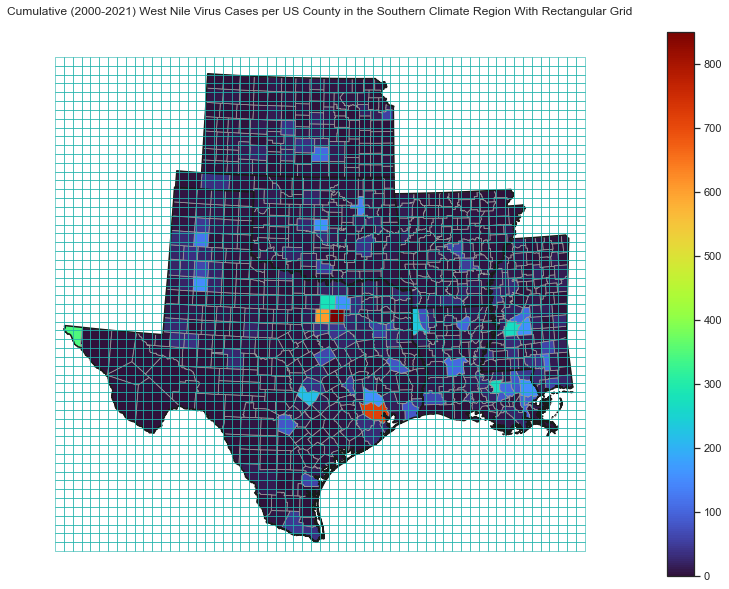

In [79]:
fig, ax = plt.subplots(figsize=(20, 10))
base.plot(column='Total', cmap='turbo', linewidth=0.8, ax=ax, edgecolor='0.6', legend=True)
South_States.plot(ax=ax, color='none', linewidth=1.5, edgecolor='0.1', legend=True)
ax.set_title('Cumulative (2000-2021) West Nile Virus Cases per US County in the Southern Climate Region With Rectangular Grid' )
south_grid2.plot(ax=ax, color = 'none',linewidth=.75, edgecolor = 'lightseagreen', alpha = 0.75)
plt.axis('off')

plt.show()

In [115]:
base.head()

OBJECTID STATE COUNTY       NAME   fips   STATE_NAME  STCODE  CTYCODE  \
0      396    28    003     Alcorn  28003  Mississippi      28        3   
1      397    28    007     Attala  28007  Mississippi      28        7   
2      398    28    013    Calhoun  28013  Mississippi      28       13   
3      399    28    023     Clarke  28023  Mississippi      28       23   
4      400    28    031  Covington  28031  Mississippi      28       31   

                                            geometry  count_n        state  \
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  Mississippi   
1  POLYGON ((620467.812 -489300.992, 606178.570 -...        5  Mississippi   
2  POLYGON ((627953.225 -360849.197, 630182.428 -...        9  Mississippi   
3  POLYGON ((667538.914 -609405.176, 663920.716 -...        5  Mississippi   
4  POLYGON ((621636.284 -616042.939, 622556.378 -...        3  Mississippi   

      county  count_nn  Total  
0     Alcorn       0.0    2.0  
1     Attala       2.0    7.0  
2    Calhoun       9.0   18.0  
3     Clarke       0.0    5.0  
4  Covington       4.0    7.0

In [80]:
# Perform spatial join, merging attribute table of WNV count and that of the cell with which it intersects
# op = "intersects" also counts those that fall on a cell boundary (between two cells)
# op = "within" will not count those fall on a cell boundary
wnv_cell = gpd.sjoin(base, south_grid, how = "inner", op = "intersects")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.


In [81]:
wnv_cell.head()

OBJECTID STATE COUNTY      NAME   fips   STATE_NAME  STCODE  CTYCODE  \
0       396    28    003    Alcorn  28003  Mississippi      28        3   
26      505    28    139    Tippah  28139  Mississippi      28      139   
32     1595    28    009    Benton  28009  Mississippi      28        9   
57     2541    28    093  Marshall  28093  Mississippi      28       93   
0       396    28    003    Alcorn  28003  Mississippi      28        3   

                                             geometry  count_n        state  \
0   POLYGON ((652348.953 -255746.896, 680927.531 -...        2  Mississippi   
26  POLYGON ((631542.793 -257338.225, 639838.728 -...        0  Mississippi   
32  POLYGON ((601252.003 -259606.471, 613459.741 -...        0  Mississippi   
57  POLYGON ((567678.960 -261770.574, 574908.022 -...        1  Mississippi   
0   POLYGON ((652348.953 -255746.896, 680927.531 -...        2  Mississippi   

      county  count_nn  Total  index_right  Grid_ID  
0     Alcorn       0.0    2.0         1190     1190  
26    Tippah       1.0    1.0         1190     1190  
32    Benton       0.0    0.0         1190     1190  
57  Marshall       0.0    1.0         1190     1190  
0     Alcorn       0.0    2.0         1222     1222

In [82]:
#get county areas from base
base['county_area'] = base.geometry.area

In [83]:
#get cell areas from south_grid
south_grid['cell_area'] = south_grid.geometry.area

In [84]:
wnv_cell2 = gpd.sjoin(base, south_grid, how = "left", predicate = "intersects")

In [85]:
wnv_cell2.head(10)

OBJECTID STATE COUNTY     NAME   fips   STATE_NAME  STCODE  CTYCODE  \
0      396    28    003   Alcorn  28003  Mississippi      28        3   
0      396    28    003   Alcorn  28003  Mississippi      28        3   
0      396    28    003   Alcorn  28003  Mississippi      28        3   
0      396    28    003   Alcorn  28003  Mississippi      28        3   
1      397    28    007   Attala  28007  Mississippi      28        7   
1      397    28    007   Attala  28007  Mississippi      28        7   
1      397    28    007   Attala  28007  Mississippi      28        7   
2      398    28    013  Calhoun  28013  Mississippi      28       13   
2      398    28    013  Calhoun  28013  Mississippi      28       13   
2      398    28    013  Calhoun  28013  Mississippi      28       13   

                                            geometry  count_n        state  \
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  Mississippi   
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  Mississippi   
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  Mississippi   
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  Mississippi   
1  POLYGON ((620467.812 -489300.992, 606178.570 -...        5  Mississippi   
1  POLYGON ((620467.812 -489300.992, 606178.570 -...        5  Mississippi   
1  POLYGON ((620467.812 -489300.992, 606178.570 -...        5  Mississippi   
2  POLYGON ((627953.225 -360849.197, 630182.428 -...        9  Mississippi   
2  POLYGON ((627953.225 -360849.197, 630182.428 -...        9  Mississippi   
2  POLYGON ((627953.225 -360849.197, 630182.428 -...        9  Mississippi   

    county  count_nn  Total   county_area  index_right  Grid_ID     cell_area  
0   Alcorn       0.0    2.0  1.040744e+09         1190     1190  2.338269e+09  
0   Alcorn       0.0    2.0  1.040744e+09         1222     1222  2.338269e+09  
0   Alcorn       0.0    2.0  1.040744e+09         1255     1255  2.338269e+09  
0   Alcorn       0.0    2.0  1.040744e+09         1223     1223  2.338269e+09  
1   Attala       2.0    7.0  1.908581e+09         1153     1153  2.338269e+09  
1   Attala       2.0    7.0  1.908581e+09         1186     1186  2.338269e+09  
1   Attala       2.0    7.0  1.908581e+09         1154     1154  2.338269e+09  
2  Calhoun       9.0   18.0  1.521916e+09         1187     1187  2.338269e+09  
2  Calhoun       9.0   18.0  1.521916e+09         1155     1155  2.338269e+09  
2  Calhoun       9.0   18.0  1.521916e+09         1188     1188  2.338269e+09

In [86]:
join= wnv_cell2.merge(south_grid, on="Grid_ID")

In [87]:
join.shape

(2873, 20)

In [88]:
join.head()

OBJECTID STATE COUNTY      NAME   fips   STATE_NAME  STCODE  CTYCODE  \
0      396    28    003    Alcorn  28003  Mississippi      28        3   
1      505    28    139    Tippah  28139  Mississippi      28      139   
2     1595    28    009    Benton  28009  Mississippi      28        9   
3     2541    28    093  Marshall  28093  Mississippi      28       93   
4      396    28    003    Alcorn  28003  Mississippi      28        3   

                                          geometry_x  count_n        state  \
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  Mississippi   
1  POLYGON ((631542.793 -257338.225, 639838.728 -...        0  Mississippi   
2  POLYGON ((601252.003 -259606.471, 613459.741 -...        0  Mississippi   
3  POLYGON ((567678.960 -261770.574, 574908.022 -...        1  Mississippi   
4  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  Mississippi   

     county  count_nn  Total   county_area  index_right  Grid_ID  \
0    Alcorn       0.0    2.0  1.040744e+09         1190     1190   
1    Tippah       1.0    1.0  1.191607e+09         1190     1190   
2    Benton       0.0    0.0  1.058528e+09         1190     1190   
3  Marshall       0.0    1.0  1.836864e+09         1190     1190   
4    Alcorn       0.0    2.0  1.040744e+09         1222     1222   

    cell_area_x                                         geometry_y  \
0  2.338269e+09  POLYGON ((649630.264 -256656.162, 634630.264 -...   
1  2.338269e+09  POLYGON ((649630.264 -256656.162, 634630.264 -...   
2  2.338269e+09  POLYGON ((649630.264 -256656.162, 634630.264 -...   
3  2.338269e+09  POLYGON ((649630.264 -256656.162, 634630.264 -...   
4  2.338269e+09  POLYGON ((694630.264 -282636.924, 679630.264 -...   

    cell_area_y  
0  2.338269e+09  
1  2.338269e+09  
2  2.338269e+09  
3  2.338269e+09  
4  2.338269e+09

In [89]:
# Calculate the area of overlap for each row
overlap_areas = []
intersection_geometrys = []
proportions=[]
count_proportions=[]
for index, row in join.iterrows():
    # Get the geometry from the first GeoDataFrame
    geom1 = row['geometry_x']  
    
    # Get the geometry from the second GeoDataFrame
    geom2 = row['geometry_y']  
    
    # Calculate the intersection geometry
    intersection_geom = geom1.intersection(geom2)
    
    
    # Calculate the area of the intersection geometry
    overlap_area = intersection_geom.area
    overlap_areas.append(overlap_area)
    # Save the polygons for intersection
    intersection_geometrys.append(intersection_geom)
    #Calculate proportions = intersection of cell grid with county area / the total cell area
    proportion = (overlap_area/row['cell_area_x'])
    proportions.append(proportion)
    # Calculate the percentage of cases (proportion of county inside intersection area * number of cases for that county)
    count_proportion = proportion*row['Total']
    count_proportions.append(count_proportion)

# Add the overlap areas as a new column in the joined GeoDataFrame
join['overlap_area'] = overlap_areas
# Add intersection geometry as a new column in join
join['intersection_geometry'] =  intersection_geometrys
# Add proportions as a new column in join
join['proportions']= proportions
# Add count proportions as a new column in join
join['count_proportions']=count_proportions

In [90]:
join.head()

OBJECTID STATE COUNTY      NAME   fips   STATE_NAME  STCODE  CTYCODE  \
0      396    28    003    Alcorn  28003  Mississippi      28        3   
1      505    28    139    Tippah  28139  Mississippi      28      139   
2     1595    28    009    Benton  28009  Mississippi      28        9   
3     2541    28    093  Marshall  28093  Mississippi      28       93   
4      396    28    003    Alcorn  28003  Mississippi      28        3   

                                          geometry_x  count_n  ...  \
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  ...   
1  POLYGON ((631542.793 -257338.225, 639838.728 -...        0  ...   
2  POLYGON ((601252.003 -259606.471, 613459.741 -...        0  ...   
3  POLYGON ((567678.960 -261770.574, 574908.022 -...        1  ...   
4  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  ...   

    county_area index_right  Grid_ID   cell_area_x  \
0  1.040744e+09        1190     1190  2.338269e+09   
1  1.191607e+09        1190     1190  2.338269e+09   
2  1.058528e+09        1190     1190  2.338269e+09   
3  1.836864e+09        1190     1190  2.338269e+09   
4  1.040744e+09        1222     1222  2.338269e+09   

                                          geometry_y   cell_area_y  \
0  POLYGON ((649630.264 -256656.162, 634630.264 -...  2.338269e+09   
1  POLYGON ((649630.264 -256656.162, 634630.264 -...  2.338269e+09   
2  POLYGON ((649630.264 -256656.162, 634630.264 -...  2.338269e+09   
3  POLYGON ((649630.264 -256656.162, 634630.264 -...  2.338269e+09   
4  POLYGON ((694630.264 -282636.924, 679630.264 -...  2.338269e+09   

   overlap_area                              intersection_geometry  \
0  4.434270e+05  POLYGON ((649060.8454000056 -256006.9200999988...   
1  2.917965e+08  POLYGON ((639838.7281000055 -256735.1239999989...   
2  6.642332e+08  POLYGON ((613459.7406000048 -258674.4498999994...   
3  1.219874e+08  POLYGON ((593825.074400004 -260164.94350000098...   
4  8.197926e+08  POLYGON ((692506.8623000011 -279495.0381999984...   

  proportions  count_proportions  
0    0.000190           0.000379  
1    0.124792           0.124792  
2    0.284071           0.000000  
3    0.052170           0.052170  
4    0.350598           0.701196  

[5 rows x 24 columns]

In [91]:
join=join.drop(columns=['index_right', 'state', 'county', 'STCODE','CTYCODE'])

In [92]:
cell_counts=join.groupby(['Grid_ID']).agg({'count_proportions': sum}).reset_index()

In [93]:
cell_counts.head()

Grid_ID  count_proportions
0       14          85.836988
1       45          30.217897
2       46         248.668675
3       47          23.892339
4       77           1.130123

In [94]:
join=join.merge(cell_counts, on="Grid_ID")

In [95]:
join.head()

OBJECTID STATE COUNTY      NAME   fips   STATE_NAME  \
0      396    28    003    Alcorn  28003  Mississippi   
1      505    28    139    Tippah  28139  Mississippi   
2     1595    28    009    Benton  28009  Mississippi   
3     2541    28    093  Marshall  28093  Mississippi   
4      396    28    003    Alcorn  28003  Mississippi   

                                          geometry_x  count_n  count_nn  \
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2       0.0   
1  POLYGON ((631542.793 -257338.225, 639838.728 -...        0       1.0   
2  POLYGON ((601252.003 -259606.471, 613459.741 -...        0       0.0   
3  POLYGON ((567678.960 -261770.574, 574908.022 -...        1       0.0   
4  POLYGON ((652348.953 -255746.896, 680927.531 -...        2       0.0   

   Total   county_area  Grid_ID   cell_area_x  \
0    2.0  1.040744e+09     1190  2.338269e+09   
1    1.0  1.191607e+09     1190  2.338269e+09   
2    0.0  1.058528e+09     1190  2.338269e+09   
3    1.0  1.836864e+09     1190  2.338269e+09   
4    2.0  1.040744e+09     1222  2.338269e+09   

                                          geometry_y   cell_area_y  \
0  POLYGON ((649630.264 -256656.162, 634630.264 -...  2.338269e+09   
1  POLYGON ((649630.264 -256656.162, 634630.264 -...  2.338269e+09   
2  POLYGON ((649630.264 -256656.162, 634630.264 -...  2.338269e+09   
3  POLYGON ((649630.264 -256656.162, 634630.264 -...  2.338269e+09   
4  POLYGON ((694630.264 -282636.924, 679630.264 -...  2.338269e+09   

   overlap_area                              intersection_geometry  \
0  4.434270e+05  POLYGON ((649060.8454000056 -256006.9200999988...   
1  2.917965e+08  POLYGON ((639838.7281000055 -256735.1239999989...   
2  6.642332e+08  POLYGON ((613459.7406000048 -258674.4498999994...   
3  1.219874e+08  POLYGON ((593825.074400004 -260164.94350000098...   
4  8.197926e+08  POLYGON ((692506.8623000011 -279495.0381999984...   

   proportions  count_proportions_x  count_proportions_y  
0     0.000190             0.000379             0.177341  
1     0.124792             0.124792             0.177341  
2     0.284071             0.000000             0.177341  
3     0.052170             0.052170             0.177341  
4     0.350598             0.701196             1.308003

In [96]:
south_grid=south_grid.merge(join, on='Grid_ID')

Text(0.5, 1.0, 'Grid-Based WNV Incidence Map')

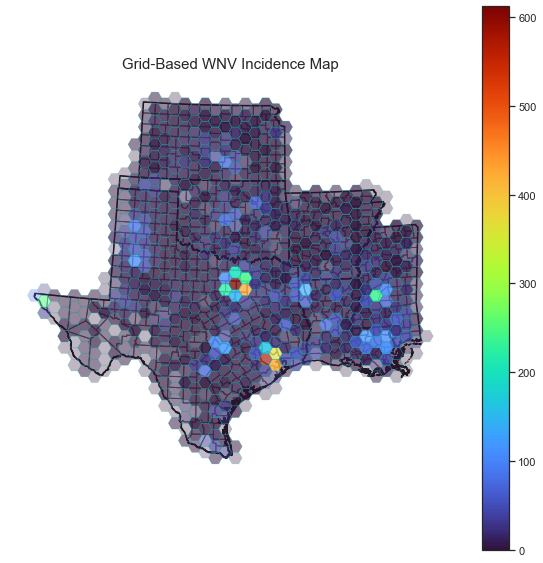

In [97]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
base.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
South_States.plot(ax=ax, color='none', linewidth=1.5, edgecolor='0.1', legend=True)
south_grid.plot(ax = ax, column='count_proportions_y', cmap = "turbo", edgecolor = 'lightseagreen', linewidth = 0.5, alpha = 0.30, legend = True)
plt.axis('off')
# Set title
ax.set_title('Grid-Based WNV Incidence Map', fontdict = {'fontsize': '15', 'fontweight' : '3'})

In [98]:
south_grid.head()

geometry  Grid_ID     cell_area  \
0  POLYGON ((-970369.736 -568425.307, -985369.736...       14  2.338269e+09   
1  POLYGON ((-925369.736 -646367.594, -940369.736...       45  2.338269e+09   
2  POLYGON ((-925369.736 -646367.594, -940369.736...       45  2.338269e+09   
3  POLYGON ((-925369.736 -594406.069, -940369.736...       46  2.338269e+09   
4  POLYGON ((-925369.736 -594406.069, -940369.736...       46  2.338269e+09   

  OBJECTID STATE COUNTY      NAME   fips STATE_NAME  \
0     3172    48    141   El Paso  48141      Texas   
1     2072    48    229  Hudspeth  48229      Texas   
2     3172    48    141   El Paso  48141      Texas   
3     2072    48    229  Hudspeth  48229      Texas   
4     3172    48    141   El Paso  48141      Texas   

                                          geometry_x  ...  Total  \
0  POLYGON ((-962474.600 -623576.639, -964143.916...  ...  346.0   
1  POLYGON ((-945625.150 -633503.354, -941131.215...  ...    2.0   
2  POLYGON ((-962474.600 -623576.639, -964143.916...  ...  346.0   
3  POLYGON ((-945625.150 -633503.354, -941131.215...  ...    2.0   
4  POLYGON ((-962474.600 -623576.639, -964143.916...  ...  346.0   

    county_area   cell_area_x  \
0  2.626726e+09  2.338269e+09   
1  1.182568e+10  2.338269e+09   
2  2.626726e+09  2.338269e+09   
3  1.182568e+10  2.338269e+09   
4  2.626726e+09  2.338269e+09   

                                          geometry_y   cell_area_y  \
0  POLYGON ((-970369.736 -568425.307, -985369.736...  2.338269e+09   
1  POLYGON ((-925369.736 -646367.594, -940369.736...  2.338269e+09   
2  POLYGON ((-925369.736 -646367.594, -940369.736...  2.338269e+09   
3  POLYGON ((-925369.736 -594406.069, -940369.736...  2.338269e+09   
4  POLYGON ((-925369.736 -594406.069, -940369.736...  2.338269e+09   

   overlap_area                              intersection_geometry  \
0  5.800865e+08  POLYGON ((-982038.2548999973 -588432.210999999...   
1  2.587580e+08  POLYGON ((-941131.2147999983 -629872.325899999...   
2  2.027169e+08  POLYGON ((-964143.9162999988 -622731.253299999...   
3  4.409492e+08  POLYGON ((-939008.9858945226 -570782.195209978...   
4  1.677954e+09  POLYGON ((-965601.8949999996 -618650.512000000...   

   proportions count_proportions_x  count_proportions_y  
0     0.248084           85.836988            85.836988  
1     0.110662            0.221324            30.217897  
2     0.086695           29.996573            30.217897  
3     0.188579            0.377159           248.668675  
4     0.717606          248.291517           248.668675  

[5 rows x 22 columns]

In [99]:
centroid = south_grid['geometry'].centroid

In [100]:
type(centroid)

geopandas.geoseries.GeoSeries

In [101]:
south_grid['cell_centroid']=centroid

In [102]:
south_grid.head()

geometry  Grid_ID     cell_area  \
0  POLYGON ((-970369.736 -568425.307, -985369.736...       14  2.338269e+09   
1  POLYGON ((-925369.736 -646367.594, -940369.736...       45  2.338269e+09   
2  POLYGON ((-925369.736 -646367.594, -940369.736...       45  2.338269e+09   
3  POLYGON ((-925369.736 -594406.069, -940369.736...       46  2.338269e+09   
4  POLYGON ((-925369.736 -594406.069, -940369.736...       46  2.338269e+09   

  OBJECTID STATE COUNTY      NAME   fips STATE_NAME  \
0     3172    48    141   El Paso  48141      Texas   
1     2072    48    229  Hudspeth  48229      Texas   
2     3172    48    141   El Paso  48141      Texas   
3     2072    48    229  Hudspeth  48229      Texas   
4     3172    48    141   El Paso  48141      Texas   

                                          geometry_x  ...   county_area  \
0  POLYGON ((-962474.600 -623576.639, -964143.916...  ...  2.626726e+09   
1  POLYGON ((-945625.150 -633503.354, -941131.215...  ...  1.182568e+10   
2  POLYGON ((-962474.600 -623576.639, -964143.916...  ...  2.626726e+09   
3  POLYGON ((-945625.150 -633503.354, -941131.215...  ...  1.182568e+10   
4  POLYGON ((-962474.600 -623576.639, -964143.916...  ...  2.626726e+09   

    cell_area_x                                         geometry_y  \
0  2.338269e+09  POLYGON ((-970369.736 -568425.307, -985369.736...   
1  2.338269e+09  POLYGON ((-925369.736 -646367.594, -940369.736...   
2  2.338269e+09  POLYGON ((-925369.736 -646367.594, -940369.736...   
3  2.338269e+09  POLYGON ((-925369.736 -594406.069, -940369.736...   
4  2.338269e+09  POLYGON ((-925369.736 -594406.069, -940369.736...   

    cell_area_y  overlap_area  \
0  2.338269e+09  5.800865e+08   
1  2.338269e+09  2.587580e+08   
2  2.338269e+09  2.027169e+08   
3  2.338269e+09  4.409492e+08   
4  2.338269e+09  1.677954e+09   

                               intersection_geometry  proportions  \
0  POLYGON ((-982038.2548999973 -588432.210999999...     0.248084   
1  POLYGON ((-941131.2147999983 -629872.325899999...     0.110662   
2  POLYGON ((-964143.9162999988 -622731.253299999...     0.086695   
3  POLYGON ((-939008.9858945226 -570782.195209978...     0.188579   
4  POLYGON ((-965601.8949999996 -618650.512000000...     0.717606   

   count_proportions_x count_proportions_y                     cell_centroid  
0            85.836988           85.836988  POINT (-1000369.736 -568425.307)  
1             0.221324           30.217897   POINT (-955369.736 -646367.594)  
2            29.996573           30.217897   POINT (-955369.736 -646367.594)  
3             0.377159          248.668675   POINT (-955369.736 -594406.069)  
4           248.291517          248.668675   POINT (-955369.736 -594406.069)  

[5 rows x 23 columns]

Text(0.5, 1.0, 'Grid-Based WNV Incidence Map')

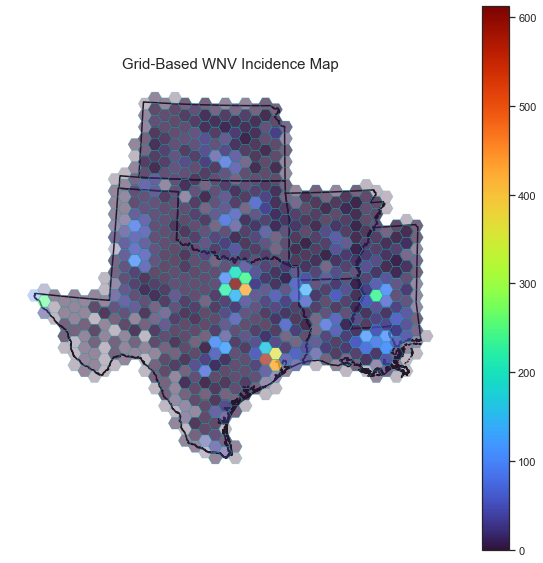

In [105]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
base.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
South_States.plot(ax=ax, color='none', linewidth=1.5, edgecolor='0.1', legend=True)
south_grid.plot(ax = ax, column='count_proportions_y', cmap = "turbo", edgecolor = 'lightseagreen', linewidth = 0.5, alpha = 0.30, legend = True)
plt.axis('off')
# Set title
ax.set_title('Grid-Based WNV Incidence Map', fontdict = {'fontsize': '15', 'fontweight' : '3'})

In [106]:
south_grid.head()

geometry  Grid_ID     cell_area  \
0  POLYGON ((-970369.736 -568425.307, -985369.736...       14  2.338269e+09   
1  POLYGON ((-925369.736 -646367.594, -940369.736...       45  2.338269e+09   
2  POLYGON ((-925369.736 -646367.594, -940369.736...       45  2.338269e+09   
3  POLYGON ((-925369.736 -594406.069, -940369.736...       46  2.338269e+09   
4  POLYGON ((-925369.736 -594406.069, -940369.736...       46  2.338269e+09   

  OBJECTID STATE COUNTY      NAME   fips STATE_NAME  \
0     3172    48    141   El Paso  48141      Texas   
1     2072    48    229  Hudspeth  48229      Texas   
2     3172    48    141   El Paso  48141      Texas   
3     2072    48    229  Hudspeth  48229      Texas   
4     3172    48    141   El Paso  48141      Texas   

                                          geometry_x  ...   county_area  \
0  POLYGON ((-962474.600 -623576.639, -964143.916...  ...  2.626726e+09   
1  POLYGON ((-945625.150 -633503.354, -941131.215...  ...  1.182568e+10   
2  POLYGON ((-962474.600 -623576.639, -964143.916...  ...  2.626726e+09   
3  POLYGON ((-945625.150 -633503.354, -941131.215...  ...  1.182568e+10   
4  POLYGON ((-962474.600 -623576.639, -964143.916...  ...  2.626726e+09   

    cell_area_x                                         geometry_y  \
0  2.338269e+09  POLYGON ((-970369.736 -568425.307, -985369.736...   
1  2.338269e+09  POLYGON ((-925369.736 -646367.594, -940369.736...   
2  2.338269e+09  POLYGON ((-925369.736 -646367.594, -940369.736...   
3  2.338269e+09  POLYGON ((-925369.736 -594406.069, -940369.736...   
4  2.338269e+09  POLYGON ((-925369.736 -594406.069, -940369.736...   

    cell_area_y  overlap_area  \
0  2.338269e+09  5.800865e+08   
1  2.338269e+09  2.587580e+08   
2  2.338269e+09  2.027169e+08   
3  2.338269e+09  4.409492e+08   
4  2.338269e+09  1.677954e+09   

                               intersection_geometry  proportions  \
0  POLYGON ((-982038.2548999973 -588432.210999999...     0.248084   
1  POLYGON ((-941131.2147999983 -629872.325899999...     0.110662   
2  POLYGON ((-964143.9162999988 -622731.253299999...     0.086695   
3  POLYGON ((-939008.9858945226 -570782.195209978...     0.188579   
4  POLYGON ((-965601.8949999996 -618650.512000000...     0.717606   

   count_proportions_x count_proportions_y                     cell_centroid  
0            85.836988           85.836988  POINT (-1000369.736 -568425.307)  
1             0.221324           30.217897   POINT (-955369.736 -646367.594)  
2            29.996573           30.217897   POINT (-955369.736 -646367.594)  
3             0.377159          248.668675   POINT (-955369.736 -594406.069)  
4           248.291517          248.668675   POINT (-955369.736 -594406.069)  

[5 rows x 23 columns]

In [108]:
point_wnv=south_grid.drop(columns=['intersection_geometry','overlap_area','count_proportions_x','cell_area_y','geometry_y','cell_area_x','geometry_x','geometry'])

In [111]:
point_wnv.rename(columns={'cell_centroid': 'geometry'}, inplace=True)

In [112]:
point_wnv.head()

Grid_ID     cell_area OBJECTID STATE COUNTY      NAME   fips STATE_NAME  \
0       14  2.338269e+09     3172    48    141   El Paso  48141      Texas   
1       45  2.338269e+09     2072    48    229  Hudspeth  48229      Texas   
2       45  2.338269e+09     3172    48    141   El Paso  48141      Texas   
3       46  2.338269e+09     2072    48    229  Hudspeth  48229      Texas   
4       46  2.338269e+09     3172    48    141   El Paso  48141      Texas   

   count_n  count_nn  Total   county_area  proportions  count_proportions_y  \
0      279      67.0  346.0  2.626726e+09     0.248084            85.836988   
1        2       0.0    2.0  1.182568e+10     0.110662            30.217897   
2      279      67.0  346.0  2.626726e+09     0.086695            30.217897   
3        2       0.0    2.0  1.182568e+10     0.188579           248.668675   
4      279      67.0  346.0  2.626726e+09     0.717606           248.668675   

                           geometry  
0  POINT (-1000369.736 -568425.307)  
1   POINT (-955369.736 -646367.594)  
2   POINT (-955369.736 -646367.594)  
3   POINT (-955369.736 -594406.069)  
4   POINT (-955369.736 -594406.069)

Text(0.5, 1.0, 'WNV Incidence Assigned to Grid Centroid')

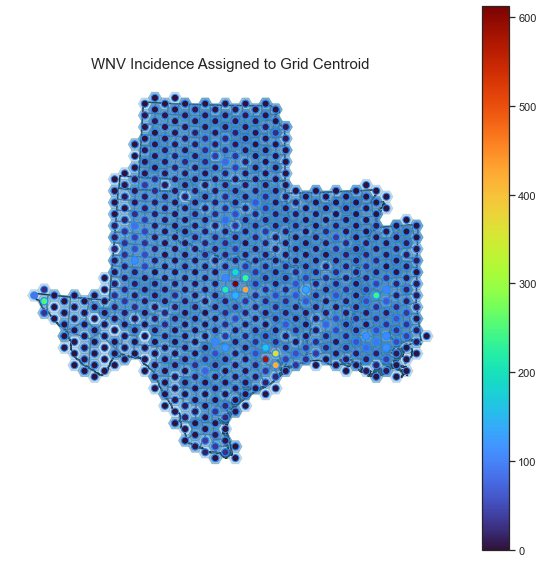

In [245]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
base.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
South_States.plot(ax=ax, color='none', linewidth=1.5, edgecolor='0.1', legend=True)
south_grid.plot(ax = ax, edgecolor = 'lightseagreen', linewidth = 0.5, alpha = 0.30, legend = True)
point_wnv.plot(ax = ax, column='count_proportions_y', cmap='turbo', edgecolor = 'dodgerblue', alpha = 1, markersize=50,legend=True)
plt.axis('off')
# Set title
ax.set_title('WNV Incidence Assigned to Grid Centroid', fontdict = {'fontsize': '15', 'fontweight' : '3'})

# Watersheds

In [104]:
TX_watershed_w= gpd.read_file(r"C:\Users\amooney\ORISE\USDA\Python\Ambers_Work\New_Data\TX_shapefile_wetlands\TX_Wetlands_West.shp") 

In [105]:
TX_watershed_e= gpd.read_file(r"C:\Users\amooney\ORISE\USDA\Python\Ambers_Work\New_Data\TX_shapefile_wetlands\TX_Wetlands_East.shp") 

In [126]:
TX_watershed_c= gpd.read_file(r"C:\Users\amooney\ORISE\USDA\Python\Ambers_Work\New_Data\TX_shapefile_wetlands\TX_Wetlands_Central.shp") 

In [127]:
MS_watershed= gpd.read_file(r"C:\Users\amooney\ORISE\USDA\Python\Ambers_Work\New_Data\MS_wetlands\MS_Wetlands.shp") 

In [128]:
OK_watershed_e= gpd.read_file(r"C:\Users\amooney\ORISE\USDA\Python\Ambers_Work\New_Data\OK_shapefile_wetlands\OK_Wetlands_East.shp") 

In [129]:
OK_watershed_w= gpd.read_file(r"C:\Users\amooney\ORISE\USDA\Python\Ambers_Work\New_Data\OK_shapefile_wetlands\OK_Wetlands_West.shp") 

In [130]:
KS_watershed_w= gpd.read_file(r"C:\Users\amooney\ORISE\USDA\Python\Ambers_Work\New_Data\KS_shapefile_wetlands\KS_Wetlands_West.shp") 

In [131]:
KS_watershed_e= gpd.read_file(r"C:\Users\amooney\ORISE\USDA\Python\Ambers_Work\New_Data\KS_shapefile_wetlands\KS_Wetlands_East.shp") 

In [134]:
AR_watershed= gpd.read_file(r"C:\Users\amooney\ORISE\USDA\Python\Ambers_Work\New_Data\AR_shapefile_wetlands\AR_Wetlands.shp") 

In [133]:
LA_watershed= gpd.read_file(r"C:\Users\amooney\ORISE\USDA\Python\Ambers_Work\New_Data\LA_shapefile_wetlands\LA_Wetlands.shp") 

In [135]:
pieces = (MS_watershed, TX_watershed_e, TX_watershed_w, TX_watershed_c, OK_watershed_e, OK_watershed_w, AR_watershed, KS_watershed_e, KS_watershed_w, LA_watershed)
watersheds = pd.concat(pieces, ignore_index = True)

In [136]:
watersheds.crs

<Projected CRS: PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["Nor ...>
Name: NAD_1983_Albers
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
#watersheds=watersheds.to_crs("ESRI:102003")

MemoryError: Unable to allocate 219. KiB for an array with shape (28080,) and data type int64

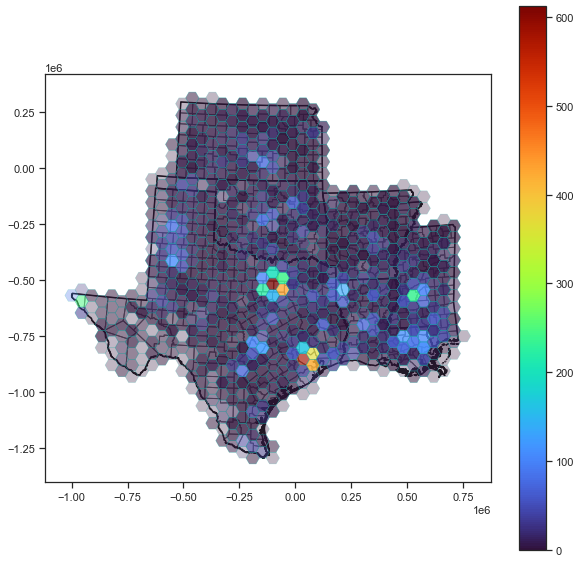

In [137]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
base.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
South_States.plot(ax=ax, color='none', linewidth=1.5, edgecolor='0.1', legend=True)
south_grid.plot(ax = ax, column='count_proportions_y', cmap = "turbo", edgecolor = 'lightseagreen', linewidth = 0.5, alpha = 0.30, legend = True)
watersheds.plot(ax=ax, edgecolor='white', linewidth=0.5, alpha=0.55)
plt.axis('off')
# Set title
ax.set_title('Grid-Based WNV Incidence Map', fontdict = {'fontsize': '15', 'fontweight' : '3'})

# Mosquito Habitat

In [119]:
# Read data (shapefile)
MOS_hab = gpd.read_file(r"C:\Users\amooney\ORISE\USDA\Python\Ambers_Work\New_Data\GLOBE_Mosquito_Habitat_Mapper.shp")

In [108]:
MOS_hab.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [122]:
south_points=south_points.to_crs("ESRI:102003")

In [145]:
# Define the bounding box of the United States
us_bbox = box(-107, 24, -88, 40)  # Bounding box coordinates: (minx, miny, maxx, maxy)

# Use the within method to filter points within the bounding box
south_points = MOS_hab[MOS_hab.geometry.within(us_bbox)]

Text(0.5, 1.0, 'Mosquito Habtitats with WNV Density')

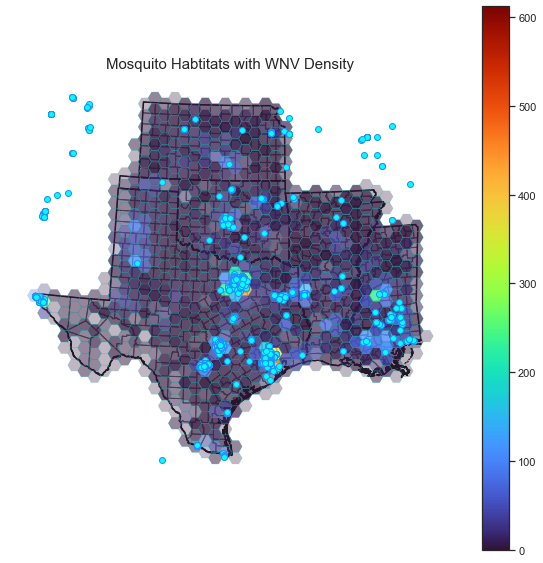

In [125]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
base.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
South_States.plot(ax=ax, color='none', linewidth=1.5, edgecolor='0.1', legend=True)
south_grid.plot(ax = ax, column='count_proportions_y', cmap = "turbo", edgecolor = 'lightseagreen', linewidth = 0.5, alpha = 0.30, legend = True)
south_points.plot(ax = ax, color = 'cyan', edgecolor = 'dodgerblue', alpha = 1)
plt.axis('off')
# Set title
ax.set_title('Mosquito Habtitats with WNV Density', fontdict = {'fontsize': '15', 'fontweight' : '3'})

In [123]:
south_points.head()

OBJECTID                             title                  datastream  \
12        13  GLOBE Observer Mosquito Habitats  Moquito Habitats 107011056   
17        18  GLOBE Observer Mosquito Habitats  Moquito Habitats 106951203   
26        27  GLOBE Observer Mosquito Habitats  Moquito Habitats 106951203   
29        30  GLOBE Observer Mosquito Habitats  Moquito Habitats 107025694   
32        33  GLOBE Observer Mosquito Habitats    Moquito Habitats 2877622   

                               datastre_1 observatio  \
12  All data on Mosquito Habitats from NA     Sensor   
17  All data on Mosquito Habitats from NA     Sensor   
26  All data on Mosquito Habitats from NA     Sensor   
29  All data on Mosquito Habitats from NA     Sensor   
32  All data on Mosquito Habitats from NA     Sensor   

                  unitOfCate  phenomenon  resultTime  \
12  Mosquito Habitat, NA, NC  2023-06-29  2023-06-29   
17  Mosquito Habitat, NA, NC  2023-06-07  2023-06-07   
26  Mosquito Habitat, NA, NC  2023-06-07  2023-06-07   
29  Mosquito Habitat, NA, NC  2023-06-29  2023-06-29   
32  Mosquito Habitat, NA, NC  2023-10-19  2023-10-19   

                                               result  submitTime  ...  \
12  https://data.globe.gov/system/photos/2023/06/2...  2023-06-29  ...   
17  https://data.globe.gov/system/photos/2023/06/0...  2023-06-07  ...   
26  https://data.globe.gov/system/photos/2023/06/0...  2023-06-07  ...   
29  https://data.globe.gov/system/photos/2023/06/2...  2023-07-28  ...   
32  https://data.globe.gov/system/photos/2023/10/1...  2023-10-24  ...   

         volunteerN                                volunteerD  \
12  User: 107011056  United States of America Citizen Science   
17  User: 106951203  United States of America Citizen Science   
26  User: 106951203  United States of America Citizen Science   
29  User: 107025694  United States of America Citizen Science   
32    User: 2877622                     GPM Satellite Mission   

                                           volunteerP   featureNam featureDes  \
12                             still: lake/pond/swamp  15RTN237909     320135   
17  flowing: still water found next to river or st...  15RTN456857     317136   
26                             still: lake/pond/swamp  15RTN450856     317164   
29                              container: artificial  14SPB959695     320616   
32                              container: artificial  14RNU966932     330757   

   featureEnc                                         featureLoc   type  \
12    GeoJSON  {'location.locationDetails.stationaryPropertie...  Point   
17    GeoJSON  {'location.locationDetails.stationaryPropertie...  Point   
26    GeoJSON  {'location.locationDetails.stationaryPropertie...  Point   
29    GeoJSON  {'location.locationDetails.stationaryPropertie...  Point   
32    GeoJSON  {'location.locationDetails.stationaryPropertie...  Point   

                   coordinate                         geometry  
12   ['-95.8561', '29.71751']    POINT (13916.927 -868739.320)  
17  ['-95.62871', '29.67532']    POINT (35926.581 -873358.328)  
26   ['-95.63488', '29.6743']    POINT (35330.000 -873473.748)  
29  ['-96.89964', '33.14657']   POINT (-83392.600 -486738.223)  
32  ['-97.99163', '30.66762']  POINT (-190391.074 -761275.437)  

[5 rows x 43 columns]

In [116]:
MOS_hab.head()

OBJECTID                             title                  datastream  \
0         1  GLOBE Observer Mosquito Habitats    Moquito Habitats 5185838   
1         2  GLOBE Observer Mosquito Habitats  Moquito Habitats 106514370   
2         3  GLOBE Observer Mosquito Habitats   Moquito Habitats 85094418   
3         4  GLOBE Observer Mosquito Habitats  Moquito Habitats 113606551   
4         5  GLOBE Observer Mosquito Habitats  Moquito Habitats 110652017   

                              datastre_1 observatio                unitOfCate  \
0  All data on Mosquito Habitats from NA     Sensor  Mosquito Habitat, NA, NC   
1  All data on Mosquito Habitats from NA     Sensor  Mosquito Habitat, NA, NC   
2  All data on Mosquito Habitats from NA     Sensor  Mosquito Habitat, NA, NC   
3  All data on Mosquito Habitats from NA     Sensor  Mosquito Habitat, NA, NC   
4  All data on Mosquito Habitats from NA     Sensor  Mosquito Habitat, NA, NC   

   phenomenon  resultTime                                             result  \
0  2024-01-08  2024-01-08  https://data.globe.gov/system/photos/2024/01/0...   
1  2024-01-08  2024-01-08  https://data.globe.gov/system/photos/2024/01/0...   
2  2024-01-07  2024-01-07  https://data.globe.gov/system/photos/2024/01/0...   
3  2023-09-07  2023-09-07  https://data.globe.gov/system/photos/2023/09/0...   
4  2023-07-19  2023-07-19  https://data.globe.gov/system/photos/2023/07/1...   

   submitTime  ...       volunteerN  \
0  2024-01-08  ...    User: 5185838   
1  2024-01-08  ...  User: 106514370   
2  2024-01-07  ...   User: 85094418   
3  2023-09-07  ...  User: 113606551   
4  2023-09-05  ...  User: 110652017   

                                          volunteerD              volunteerP  \
0                            Education Working Group   container: artificial   
1                             Uganda Citizen Science   container: artificial   
2                            Lebanon Citizen Science  still: lake/pond/swamp   
3  INSTITUCION EDUCATIVA NORMAL SUPERIOR DE ENVIGADO   container: artificial   
4                           Thailand Citizen Science   container: artificial   

    featureNam featureDes featureEnc  \
0  36NVF474316     336219    GeoJSON   
1  36NVF467314     336222    GeoJSON   
2  36SYC558320     336174    GeoJSON   
3  17PKM338172     325565    GeoJSON   
4  47PPK017597     214416    GeoJSON   

                                          featureLoc   type  \
0  {'location.locationDetails.stationaryPropertie...  Point   
1  {'location.locationDetails.stationaryPropertie...  Point   
2  {'location.locationDetails.stationaryPropertie...  Point   
3  {'location.locationDetails.stationaryPropertie...  Point   
4  {'location.locationDetails.stationaryPropertie...  Point   

                  coordinate                            geometry  
0     ['32.5273', '0.28589']    POINT (11969654.924 5666233.020)  
1    ['32.52101', '0.28408']    POINT (11969647.692 5665403.367)  
2   ['35.75979', '33.69718']     POINT (8599593.343 6718736.236)  
3  ['-83.42897', '10.09766']    POINT (1489247.609 -2870369.769)  
4    ['99.92444', '8.68092']  POINT (-11296754.487 10095540.667)  

[5 rows x 43 columns]

In [128]:
#read in file
df = pd.read_csv(r"C:\Users\amooney\ORISE\USDA\Python\example_features.csv") 

In [249]:
df.head()

FIPS  Year  Week  AVI  EQU  MOS  SEN       PPT      Temp   None  ...   D3  \
0  4003  2002     1    0    0    0    0 -0.113418  1.670065  100.0  ...  0.0   
1  4009  2002     1    0    0    0    0 -0.663895  1.439966  100.0  ...  0.0   
2  4012  2002     1    0    0    0    0 -0.814240  1.735524  100.0  ...  0.0   
3  4015  2002     1    0    0    0    0 -0.756650  1.627949  100.0  ...  0.0   
4  4023  2002     1    0    0    0    0 -0.652285  1.633667  100.0  ...  0.0   

    D4  Richness       Horses     s_DEM  s.EstPop  s.Pov_pct  s.Med_income  \
0  0.0        47  7226.924000  2.618147  0.066044   0.175648     -0.875392   
1  0.0        19  2297.984338  2.637895 -0.206849   1.125349     -1.262496   
2  0.0        29   298.840027  0.555184 -0.250198   0.830614     -1.555611   
3  0.0        37  2710.357716  1.887487  0.211931   0.011906     -1.065716   
4  0.0        46  2942.269804  1.899335 -0.185474   0.617750     -1.085419   

     Area.S    Month  
0  3.994242  January  
1  2.797780  January  
2  2.696061  January  
3  9.513779  January  
4  0.204342  January  

[5 rows x 23 columns]

In [129]:
active_months =["April", "May", "June", "July","August","September"] #choose a subset of months to work with
mask = df['Month'].isin(active_months) #define a mask
reduced_df=df[mask]
reduced_df.head()

FIPS  Year  Week  AVI  EQU  MOS  SEN       PPT      Temp  None  ...  \
40417  4003  2002    14    0    0    0    0 -1.735359  1.715811   0.0  ...   
40418  4009  2002    14    0    0    0    0 -1.482260  1.819129   0.0  ...   
40419  4012  2002    14    0    0    0    0 -1.726572  1.888379   0.0  ...   
40420  4015  2002    14    0    0    0    0 -1.289661  2.069447   0.0  ...   
40421  4023  2002    14    0    0    0    0 -1.772751  1.557414   0.0  ...   

        D3   D4  Richness       Horses     s_DEM  s.EstPop  s.Pov_pct  \
40417  0.0  0.0        55  7226.924000  2.618147  0.066044   0.175648   
40418  0.0  0.0        45  2297.984338  2.637895 -0.206849   1.125349   
40419  0.0  0.0        33   298.840027  0.555184 -0.250198   0.830614   
40420  0.0  0.0        43  2710.357716  1.887487  0.211931   0.011906   
40421  0.0  0.0        54  2942.269804  1.899335 -0.185474   0.617750   

       s.Med_income    Area.S  Month  
40417     -0.875392  3.994242  April  
40418     -1.262496  2.797780  April  
40419     -1.555611  2.696061  April  
40420     -1.065716  9.513779  April  
40421     -1.085419  0.204342  April  

[5 rows x 23 columns]

In [130]:
reduced_df=reduced_df.reset_index() #reset indices

In [131]:
reduced_df=reduced_df.drop(['index'], axis=1) #drop the redundant index column. 

In [132]:
reduced_df['ZOO']=reduced_df['AVI']+reduced_df['EQU']+reduced_df['MOS']+reduced_df['SEN'] #combine all zoo indicators

In [133]:
grouped_x = reduced_df.groupby(['Year', 'FIPS']).agg({'ZOO':sum, 'AVI':sum, 'EQU':sum, 'MOS':sum, 'SEN':sum,'PPT': sum,'Temp': max, 'D0': 'mean' , 'D1':'mean', 'D2':'mean',
                                                      'D3':'mean', 'D4':'mean', 'Richness': 'mean', 'Horses': max, 
                                                      's_DEM': 'mean', 's.EstPop': 'mean', 's.Pov_pct': 'mean', 
                                                      's.Med_income':'mean', 'Area.S':max })

In [152]:
grouped_x=grouped_x.reset_index()

In [155]:
grouped_x.rename(columns={'FIPS':'fips'},inplace=True)

In [156]:
grouped_x.head()

Year  fips  ZOO  AVI  EQU  MOS  SEN        PPT      Temp          D0  ...  \
0  2002  1001   10    8    2    0    0  10.466767  1.277488   93.018846  ...   
1  2002  1003   21   18    3    0    0  70.277758  1.568893   58.185385  ...   
2  2002  1005    2    2    0    0    0  25.694333  1.440559  100.000000  ...   
3  2002  1007    1    1    0    0    0  14.762482  1.290583   70.210385  ...   
4  2002  1009    2    2    0    0    0  25.618714  1.006374   66.093462  ...   

          D2   D3   D4   Richness       Horses     s_DEM  s.EstPop  s.Pov_pct  \
0   3.550385  0.0  0.0  12.538462   952.416600 -0.573061 -0.166887  -0.872299   
1  32.724615  0.0  0.0  32.115385  4187.784000 -0.699446  0.154601  -0.806802   
2  42.925385  0.0  0.0  26.307692   580.949500 -0.604657 -0.221249   1.305465   
3   0.000000  0.0  0.0  11.730769   678.113315 -0.578327 -0.244732   0.339389   
4   0.000000  0.0  0.0   6.923077  5374.019086 -0.376902 -0.145962  -0.495693   

   s.Med_income    Area.S  
0     -0.075447 -0.277922  
1     -0.245061  0.542331  
2     -1.547897 -0.047814  
3     -1.035784 -0.261732  
4     -0.616653 -0.243683  

[5 rows x 21 columns]

In [148]:
base.head()

OBJECTID STATE COUNTY       NAME   fips   STATE_NAME  STCODE  CTYCODE  \
0      396    28    003     Alcorn  28003  Mississippi      28        3   
1      397    28    007     Attala  28007  Mississippi      28        7   
2      398    28    013    Calhoun  28013  Mississippi      28       13   
3      399    28    023     Clarke  28023  Mississippi      28       23   
4      400    28    031  Covington  28031  Mississippi      28       31   

                                            geometry  count_n        state  \
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  Mississippi   
1  POLYGON ((620467.812 -489300.992, 606178.570 -...        5  Mississippi   
2  POLYGON ((627953.225 -360849.197, 630182.428 -...        9  Mississippi   
3  POLYGON ((667538.914 -609405.176, 663920.716 -...        5  Mississippi   
4  POLYGON ((621636.284 -616042.939, 622556.378 -...        3  Mississippi   

      county  count_nn  Total   county_area  
0     Alcorn       0.0    2.0  1.040744e+09  
1     Attala       2.0    7.0  1.908581e+09  
2    Calhoun       9.0   18.0  1.521916e+09  
3     Clarke       0.0    5.0  1.794993e+09  
4  Covington       4.0    7.0  1.073724e+09

In [213]:
ppt = grouped_x.groupby(['fips']).agg({'PPT': 'mean'})

In [214]:
ppt=ppt.reset_index()

In [215]:
ppt_merge=base.merge(ppt,on="fips")

In [216]:
ppt_merge.head()

OBJECTID STATE COUNTY       NAME   fips   STATE_NAME  STCODE  CTYCODE  \
0      396    28    003     Alcorn  28003  Mississippi      28        3   
1      397    28    007     Attala  28007  Mississippi      28        7   
2      398    28    013    Calhoun  28013  Mississippi      28       13   
3      399    28    023     Clarke  28023  Mississippi      28       23   
4      400    28    031  Covington  28031  Mississippi      28       31   

                                            geometry  count_n        state  \
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  Mississippi   
1  POLYGON ((620467.812 -489300.992, 606178.570 -...        5  Mississippi   
2  POLYGON ((627953.225 -360849.197, 630182.428 -...        9  Mississippi   
3  POLYGON ((667538.914 -609405.176, 663920.716 -...        5  Mississippi   
4  POLYGON ((621636.284 -616042.939, 622556.378 -...        3  Mississippi   

      county  count_nn  Total   county_area        PPT  
0     Alcorn       0.0    2.0  1.040744e+09   5.843756  
1     Attala       2.0    7.0  1.908581e+09  11.496116  
2    Calhoun       9.0   18.0  1.521916e+09  11.343528  
3     Clarke       0.0    5.0  1.794993e+09  14.339877  
4  Covington       4.0    7.0  1.073724e+09  11.454094

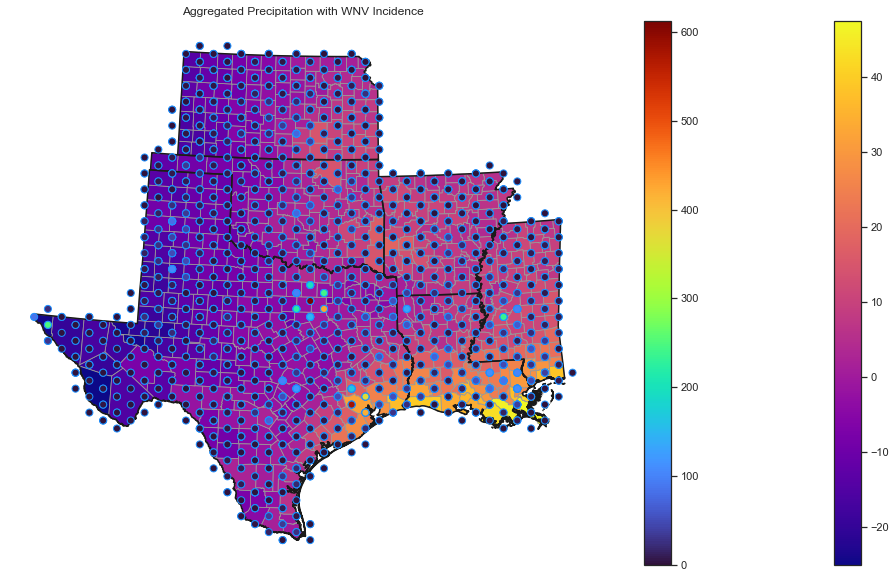

In [234]:
fig, ax = plt.subplots(figsize=(20, 10))
ppt_merge.plot(column='PPT', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.6', legend=True)
South_States.plot(ax=ax, color='none', linewidth=1.5, edgecolor='0.1', legend=True)
ax.set_title('Aggregated Precipitation with WNV Incidence' )
point_wnv.plot(ax = ax, column='count_proportions_y', cmap='turbo', edgecolor = 'dodgerblue', alpha = 1, markersize=50,legend=True)
#south_grid.plot(ax=ax, color = 'none',linewidth=.75, edgecolor = 'lightseagreen', alpha = 0.55)
plt.axis('off')

plt.show()

In [229]:
zoo = grouped_x.groupby(['fips']).agg({'ZOO': sum})
zoo=zoo.reset_index()
zoo_merge=base.merge(zoo,on="fips")

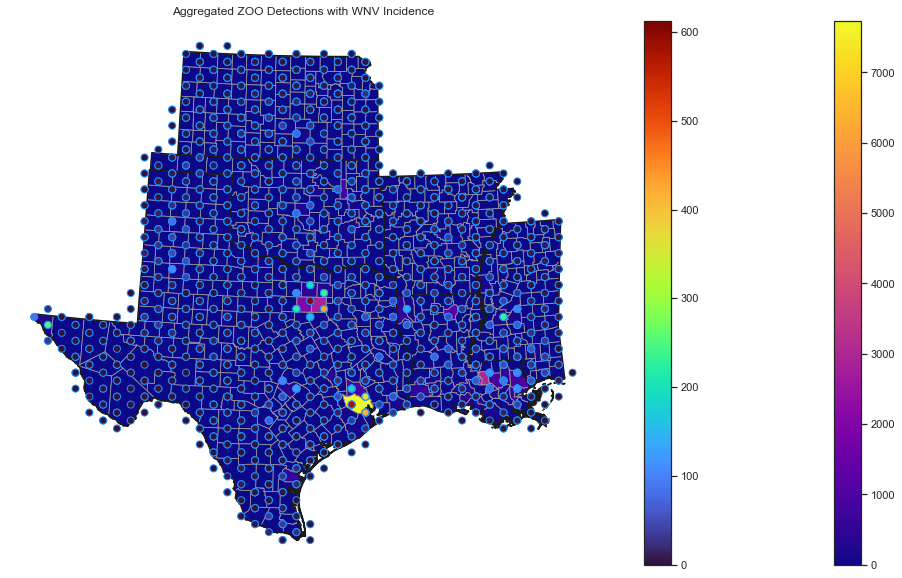

In [233]:
fig, ax = plt.subplots(figsize=(20, 10))
zoo_merge.plot(column='ZOO', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.6', legend=True)
South_States.plot(ax=ax, color='none', linewidth=1.5, edgecolor='0.1', legend=True)
ax.set_title('Aggregated ZOO Detections with WNV Incidence' )
point_wnv.plot(ax = ax, column='count_proportions_y', cmap='turbo', edgecolor = 'dodgerblue', alpha = 1, markersize=50,legend=True)
#south_grid.plot(ax=ax, color = 'none',linewidth=.75, edgecolor = 'lightseagreen', alpha = 0.55)
plt.axis('off')

plt.show()

In [235]:
D0 = grouped_x.groupby(['fips']).agg({'D0': 'mean'})
D0=D0.reset_index()
D0_merge=base.merge(D0,on="fips")

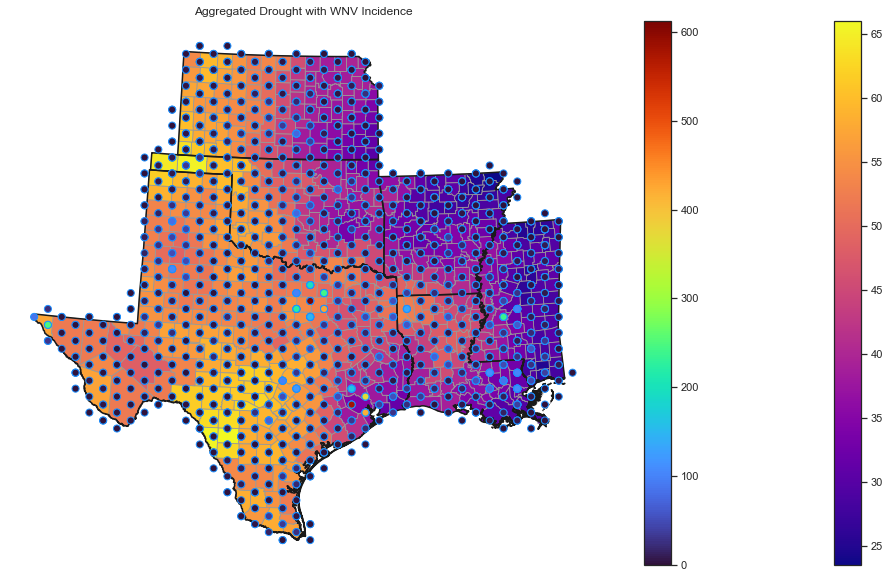

In [244]:
fig, ax = plt.subplots(figsize=(20, 10))
D0_merge.plot(column='D0', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.6', legend=True)
South_States.plot(ax=ax, color='none', linewidth=1.5, edgecolor='0.1', legend=True)
ax.set_title('Aggregated Drought with WNV Incidence' )
point_wnv.plot(ax = ax, column='count_proportions_y', cmap='turbo', edgecolor = 'dodgerblue', alpha = 1, markersize=50,legend=True)
#south_grid.plot(ax=ax, color = 'none',linewidth=.75, edgecolor = 'lightseagreen', alpha = 0.55)
plt.axis('off')

plt.show()

In [238]:
D1 = grouped_x.groupby(['fips']).agg({'D1': 'mean'})
D1=D1.reset_index()
D1_merge=base.merge(D1,on="fips")

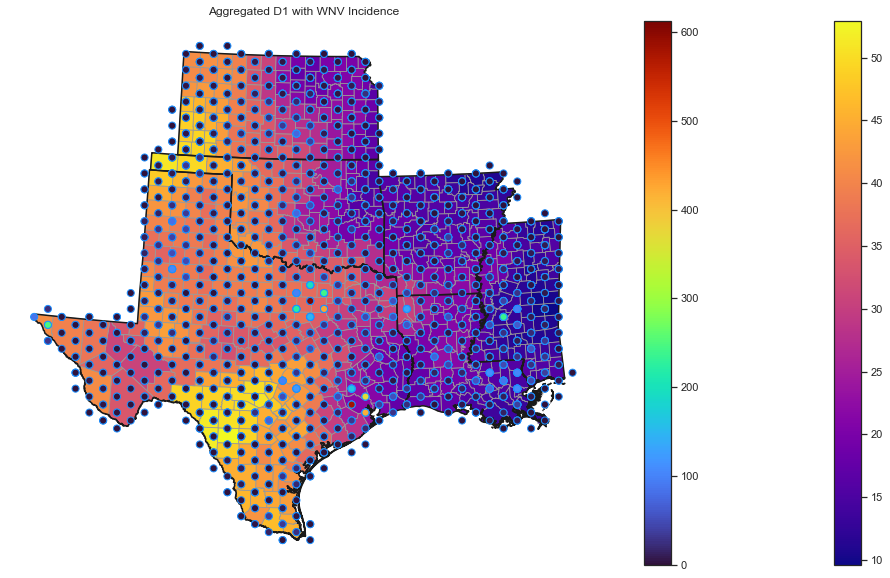

In [239]:
fig, ax = plt.subplots(figsize=(20, 10))
D1_merge.plot(column='D1', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.6', legend=True)
South_States.plot(ax=ax, color='none', linewidth=1.5, edgecolor='0.1', legend=True)
ax.set_title('Aggregated D1 with WNV Incidence' )
point_wnv.plot(ax = ax, column='count_proportions_y', cmap='turbo', edgecolor = 'dodgerblue', alpha = 1, markersize=50,legend=True)
#south_grid.plot(ax=ax, color = 'none',linewidth=.75, edgecolor = 'lightseagreen', alpha = 0.55)
plt.axis('off')

plt.show()

In [241]:
pop = grouped_x.groupby(['fips']).agg({'s.EstPop': 'mean'})
pop=pop.reset_index()
pop_merge=base.merge(pop,on="fips")

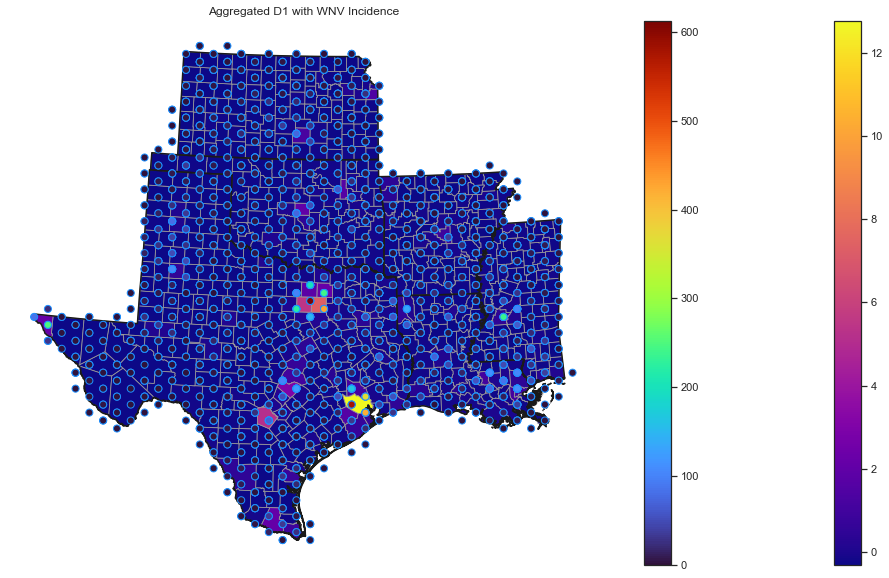

In [242]:
fig, ax = plt.subplots(figsize=(20, 10))
pop_merge.plot(column='s.EstPop', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.6', legend=True)
South_States.plot(ax=ax, color='none', linewidth=1.5, edgecolor='0.1', legend=True)
ax.set_title('Aggregated D1 with WNV Incidence' )
point_wnv.plot(ax = ax, column='count_proportions_y', cmap='turbo', edgecolor = 'dodgerblue', alpha = 1, markersize=50,legend=True)
#south_grid.plot(ax=ax, color = 'none',linewidth=.75, edgecolor = 'lightseagreen', alpha = 0.55)
plt.axis('off')

plt.show()

In [243]:
grouped_x.head()

Year  fips  ZOO  AVI  EQU  MOS  SEN        PPT      Temp          D0  ...  \
0  2002  1001   10    8    2    0    0  10.466767  1.277488   93.018846  ...   
1  2002  1003   21   18    3    0    0  70.277758  1.568893   58.185385  ...   
2  2002  1005    2    2    0    0    0  25.694333  1.440559  100.000000  ...   
3  2002  1007    1    1    0    0    0  14.762482  1.290583   70.210385  ...   
4  2002  1009    2    2    0    0    0  25.618714  1.006374   66.093462  ...   

          D2   D3   D4   Richness       Horses     s_DEM  s.EstPop  s.Pov_pct  \
0   3.550385  0.0  0.0  12.538462   952.416600 -0.573061 -0.166887  -0.872299   
1  32.724615  0.0  0.0  32.115385  4187.784000 -0.699446  0.154601  -0.806802   
2  42.925385  0.0  0.0  26.307692   580.949500 -0.604657 -0.221249   1.305465   
3   0.000000  0.0  0.0  11.730769   678.113315 -0.578327 -0.244732   0.339389   
4   0.000000  0.0  0.0   6.923077  5374.019086 -0.376902 -0.145962  -0.495693   

   s.Med_income    Area.S  
0     -0.075447 -0.277922  
1     -0.245061  0.542331  
2     -1.547897 -0.047814  
3     -1.035784 -0.261732  
4     -0.616653 -0.243683  

[5 rows x 21 columns]

# Interpolation

In [246]:
import numpy as np
from scipy.spatial import distance

def inverse_distance_weighting(target_point, observed_points, observed_values, p=2):
    distances = distance.cdist([target_point], observed_points)[0]
    weights = 1 / distances**p
    interpolated_value = np.sum(weights * observed_values) / np.sum(weights)
    return interpolated_value

In [247]:
example_features.tail()

NameError: name 'example_features' is not defined

# Drought

In [139]:
import rasterio

# Open the .bil file
with rasterio.open(r"C:\Users\amooney\ORISE\USDA\Python\Ambers_Work\New_Data\PRISM_ppt_stable_4kmM3_2001_bil.bil") as src:
    # Read raster data
    data = src.read()

    # Get metadata
    cols = src.width
    rows = src.height
    bands = src.count
    profile = src.profile


In [144]:
# Create grid of coordinates
x_coords = np.linspace(start_x, end_x, cols)  # Adjust start_x and end_x as per your data
y_coords = np.linspace(start_y, end_y, rows)  # Adjust start_y and end_y as per your data
xx, yy = np.meshgrid(x_coords, y_coords)

# Flatten coordinates
coordinates = np.vstack((xx.flatten(), yy.flatten())).T

# Create GeoDataFrame
df = gpd.GeoDataFrame({'value': data, 'geometry': gpd.points_from_xy(coordinates[:, 0], coordinates[:, 1])})

# Set CRS if known
df.crs = 'EPSG:4326'  # Adjust CRS as per your data

# Optionally, save GeoDataFrame
df.to_file('output.shp')

# Optionally, visualize GeoDataFrame
df.plot(column='value', cmap='viridis', legend=True)

NameError: name 'start_x' is not defined

In [385]:
wnv_cell2.head()

Cell_Count
Grid_ID            
14            346.0
45            348.0
46            348.0
47            346.0
77              2.0

In [376]:
# Set field name to hold the count for the cell
cell_count = "Cell_Count"

In [377]:
wnv_cell2[cell_count] = wnv_cell2['Total']

KeyError: 'Total'

In [378]:
wnv_cell2.head()

Cell_Count
Grid_ID            
14            346.0
45            348.0
46            348.0
47            346.0
77              2.0

In [372]:
# Group GeoDataFrame by cell while aggregating the Count Field values
wnv_cell2 = wnv_cell2.groupby('Grid_ID').agg({cell_count:'sum'})

In [129]:
wnv_cell2.head()

Cell_Count
Grid_ID            
45            346.0
108             3.0
141             0.0
170             3.0
235             1.0

In [379]:
# Merge the resulting grouped dataframe with the grid GeoDataFrame, using a left join to keep all cell polygons
south_grid = south_grid.merge(wnv_cell2, on = 'Grid_ID', how = "left")

In [380]:
south_grid.iloc[45]

geometry      POLYGON ((-925369.7357161749 -646367.593723086...
Grid_ID                                                      45
cell_area                                     2338268590.217987
Cell_Count                                                348.0
Name: 45, dtype: object

In [381]:
# Fill the NaN values (cells without any points) with 0
south_grid[cell_count] = south_grid[cell_count].fillna(0)

In [382]:
# Convert Count field to integer
south_grid[cell_count] = south_grid[cell_count].astype(int)

In [383]:
# Display grid attribute table
display(south_grid.head(50))

geometry  Grid_ID     cell_area  \
0   POLYGON ((-970369.736 -1295886.647, -985369.73...        0  2.338269e+09   
1   POLYGON ((-970369.736 -1243925.122, -985369.73...        1  2.338269e+09   
2   POLYGON ((-970369.736 -1191963.598, -985369.73...        2  2.338269e+09   
3   POLYGON ((-970369.736 -1140002.074, -985369.73...        3  2.338269e+09   
4   POLYGON ((-970369.736 -1088040.550, -985369.73...        4  2.338269e+09   
5   POLYGON ((-970369.736 -1036079.025, -985369.73...        5  2.338269e+09   
6   POLYGON ((-970369.736 -984117.501, -985369.736...        6  2.338269e+09   
7   POLYGON ((-970369.736 -932155.977, -985369.736...        7  2.338269e+09   
8   POLYGON ((-970369.736 -880194.453, -985369.736...        8  2.338269e+09   
9   POLYGON ((-970369.736 -828232.929, -985369.736...        9  2.338269e+09   
10  POLYGON ((-970369.736 -776271.404, -985369.736...       10  2.338269e+09   
11  POLYGON ((-970369.736 -724309.880, -985369.736...       11  2.338269e+09   
12  POLYGON ((-970369.736 -672348.356, -985369.736...       12  2.338269e+09   
13  POLYGON ((-970369.736 -620386.832, -985369.736...       13  2.338269e+09   
14  POLYGON ((-970369.736 -568425.307, -985369.736...       14  2.338269e+09   
15  POLYGON ((-970369.736 -516463.783, -985369.736...       15  2.338269e+09   
16  POLYGON ((-970369.736 -464502.259, -985369.736...       16  2.338269e+09   
17  POLYGON ((-970369.736 -412540.735, -985369.736...       17  2.338269e+09   
18  POLYGON ((-970369.736 -360579.210, -985369.736...       18  2.338269e+09   
19  POLYGON ((-970369.736 -308617.686, -985369.736...       19  2.338269e+09   
20  POLYGON ((-970369.736 -256656.162, -985369.736...       20  2.338269e+09   
21  POLYGON ((-970369.736 -204694.638, -985369.736...       21  2.338269e+09   
22  POLYGON ((-970369.736 -152733.114, -985369.736...       22  2.338269e+09   
23  POLYGON ((-970369.736 -100771.589, -985369.736...       23  2.338269e+09   
24  POLYGON ((-970369.736 -48810.065, -985369.736 ...       24  2.338269e+09   
25  POLYGON ((-970369.736 3151.459, -985369.736 29...       25  2.338269e+09   
26  POLYGON ((-970369.736 55112.983, -985369.736 8...       26  2.338269e+09   
27  POLYGON ((-970369.736 107074.508, -985369.736 ...       27  2.338269e+09   
28  POLYGON ((-970369.736 159036.032, -985369.736 ...       28  2.338269e+09   
29  POLYGON ((-970369.736 210997.556, -985369.736 ...       29  2.338269e+09   
30  POLYGON ((-970369.736 262959.080, -985369.736 ...       30  2.338269e+09   
31  POLYGON ((-970369.736 314920.604, -985369.736 ...       31  2.338269e+09   
32  POLYGON ((-925369.736 -1321867.409, -940369.73...       32  2.338269e+09   
33  POLYGON ((-925369.736 -1269905.884, -940369.73...       33  2.338269e+09   
34  POLYGON ((-925369.736 -1217944.360, -940369.73...       34  2.338269e+09   
35  POLYGON ((-925369.736 -1165982.836, -940369.73...       35  2.338269e+09   
36  POLYGON ((-925369.736 -1114021.312, -940369.73...       36  2.338269e+09   
37  POLYGON ((-925369.736 -1062059.788, -940369.73...       37  2.338269e+09   
38  POLYGON ((-925369.736 -1010098.263, -940369.73...       38  2.338269e+09   
39  POLYGON ((-925369.736 -958136.739, -940369.736...       39  2.338269e+09   
40  POLYGON ((-925369.736 -906175.215, -940369.736...       40  2.338269e+09   
41  POLYGON ((-925369.736 -854213.691, -940369.736...       41  2.338269e+09   
42  POLYGON ((-925369.736 -802252.166, -940369.736...       42  2.338269e+09   
43  POLYGON ((-925369.736 -750290.642, -940369.736...       43  2.338269e+09   
44  POLYGON ((-925369.736 -698329.118, -940369.736...       44  2.338269e+09   
45  POLYGON ((-925369.736 -646367.594, -940369.736...       45  2.338269e+09   
46  POLYGON ((-925369.736 -594406.069, -940369.736...       46  2.338269e+09   
47  POLYGON ((-925369.736 -542444.545, -940369.736...       47  2.338269e+09   
48  POLYGON ((-925369.736 -490483.021, -940369.736...       48  2.338269e+09   
49  POLYGON ((-925369.736 -438521.497, -94036

Text(0.5, 1.0, 'Southern Climate Region - WNV Density')

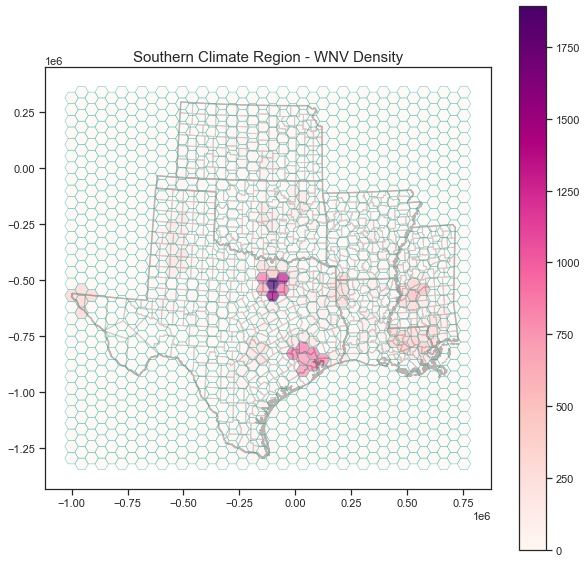

In [384]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
base.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
South_States.plot(ax=ax, color='none', linewidth=1.5, edgecolor='0.1', legend=True)
south_grid.plot(ax = ax, column = "Cell_Count", cmap = "RdPu", edgecolor = 'lightseagreen', linewidth = 0.5, alpha = 0.70, legend = True)

# Set title
ax.set_title('Southern Climate Region - WNV Density', fontdict = {'fontsize': '15', 'fontweight' : '3'})

In [265]:
join.head()

OBJECTID STATE COUNTY      NAME   fips   STATE_NAME  \
0      396    28    003    Alcorn  28003  Mississippi   
1      505    28    139    Tippah  28139  Mississippi   
2     1595    28    009    Benton  28009  Mississippi   
3     2541    28    093  Marshall  28093  Mississippi   
4      396    28    003    Alcorn  28003  Mississippi   

                                          geometry_x  count_n  count_nn  \
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2       0.0   
1  POLYGON ((631542.793 -257338.225, 639838.728 -...        0       1.0   
2  POLYGON ((601252.003 -259606.471, 613459.741 -...        0       0.0   
3  POLYGON ((567678.960 -261770.574, 574908.022 -...        1       0.0   
4  POLYGON ((652348.953 -255746.896, 680927.531 -...        2       0.0   

   Total  ...  Cell_Count_x   cell_area_x  \
0    2.0  ...             2  2.338269e+09   
1    1.0  ...             2  2.338269e+09   
2    0.0  ...             2  2.338269e+09   
3    1.0  ...             2  2.338269e+09   
4    2.0  ...             0  2.338269e+09   

                                          geometry_y  Cell_Count_y  \
0  POLYGON ((649630.264 -256656.162, 634630.264 -...             2   
1  POLYGON ((649630.264 -256656.162, 634630.264 -...             2   
2  POLYGON ((649630.264 -256656.162, 634630.264 -...             2   
3  POLYGON ((649630.264 -256656.162, 634630.264 -...             2   
4  POLYGON ((694630.264 -282636.924, 679630.264 -...             0   

    cell_area_y  overlap_area  \
0  2.338269e+09  4.434270e+05   
1  2.338269e+09  2.917965e+08   
2  2.338269e+09  6.642332e+08   
3  2.338269e+09  1.219874e+08   
4  2.338269e+09  8.197926e+08   

                               intersection_geometry  proportions  \
0  POLYGON ((649060.8454000056 -256006.9200999988...     0.000190   
1  POLYGON ((639838.7281000055 -256735.1239999989...     0.124792   
2  POLYGON ((613459.7406000048 -258674.4498999994...     0.284071   
3  POLYGON ((593825.074400004 -260164.94350000098...     0.052170   
4  POLYGON ((692506.8623000011 -279495.0381999984...     0.350598   

  count_proportions_x  count_proportions_y  
0            0.000379             0.177341  
1            0.124792             0.177341  
2            0.000000             0.177341  
3            0.052170             0.177341  
4            0.701196             1.308003  

[5 rows x 22 columns]

In [139]:
#south_grid contains polygon info for grid
#base contains polygon info for county boundaries
south_grid.head()

geometry  Grid_ID  Cell_Count
0  POLYGON ((-970369.736 -1295886.647, -985369.73...        0           0
1  POLYGON ((-970369.736 -1243925.122, -985369.73...        1           0
2  POLYGON ((-970369.736 -1191963.598, -985369.73...        2           0
3  POLYGON ((-970369.736 -1140002.074, -985369.73...        3           0
4  POLYGON ((-970369.736 -1088040.550, -985369.73...        4           0

In [140]:
south_grid.shape

(1300, 3)

In [144]:
#get county areas from base
base['county_area'] = base.geometry.area

In [148]:
base.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [150]:
base.tail(20)

OBJECTID STATE COUNTY                  NAME   fips STATE_NAME  STCODE  \
637     1667    22    071               Orleans  22071  Louisiana      22   
638     1676    22    117            Washington  22117  Louisiana      22   
639     1677    22    123          West Carroll  22123  Louisiana      22   
640     1678    22    125        West Feliciana  22125  Louisiana      22   
641     1696    22    077         Pointe Coupee  22077  Louisiana      22   
642     1697    22    079               Rapides  22079  Louisiana      22   
643     1698    22    081             Red River  22081  Louisiana      22   
644     1699    22    083              Richland  22083  Louisiana      22   
645     1700    22    085                Sabine  22085  Louisiana      22   
646     1701    22    091            St. Helena  22091  Louisiana      22   
647     1702    22    093             St. James  22093  Louisiana      22   
648     1703    22    095  St. John the Baptist  22095  Louisiana      22   
649     1704    22    097            St. Landry  22097  Louisiana      22   
650     1705    22    099            St. Martin  22099  Louisiana      22   
651     1706    22    101              St. Mary  22101  Louisiana      22   
652     1740    22    103           St. Tammany  22103  Louisiana      22   
653     1741    22    107                Tensas  22107  Louisiana      22   
654     1742    22    109            Terrebonne  22109  Louisiana      22   
655     1743    22    113             Vermilion  22113  Louisiana      22   
656     1744    22    115                Vernon  22115  Louisiana      22   

     CTYCODE                                           geometry  count_n  \
637       71  POLYGON ((566075.737 -822594.182, 566126.086 -...       49   
638      117  POLYGON ((537900.880 -710277.495, 537901.922 -...       24   
639      123  POLYGON ((406694.056 -531272.022, 407802.520 -...        5   
640      125  MULTIPOLYGON (((413272.516 -717504.471, 411978...        3   
641       77  POLYGON ((412996.220 -720189.106, 414880.640 -...        9   
642       79  POLYGON ((324286.282 -732067.522, 312706.629 -...       79   
643       81  POLYGON ((263998.141 -594559.469, 265839.029 -...        2   
644       83  POLYGON ((381803.303 -550402.236, 382275.303 -...        5   
645       85  POLYGON ((204641.380 -658760.021, 204641.314 -...        1   
646       91  POLYGON ((492412.871 -712982.707, 496413.400 -...        6   
647       93  POLYGON ((515458.686 -835204.678, 513088.777 -...        4   
648       95  POLYGON ((515104.551 -804414.394, 515642.423 -...        3   
649       97  POLYGON ((335944.510 -777862.676, 336793.685 -...        7   
650       99  MULTIPOLYGON (((473783.947 -858540.944, 472578...        3   
651      101  POLYGON ((475884.501 -866541.630, 472592.867 -...        1   
652      103  POLYGON ((604366.229 -766346.549, 605030.595 -...       84   
653      107  POLYGON ((466445.727 -590066.168, 466500.456 -...        0   
654      109  POLYGON ((482704.274 -856369.511, 494914.059 -...        5   
655      113  POLYGON ((389183.807 -850870.465, 388441.466 -...        2   
656      115  POLYGON ((232800.698 -737848.506, 232137.486 -...        3   

         state                county  count_nn  Total          area  \
637  Louisiana               Orleans      40.0   89.0  9.032449e+08   
638  Louisiana            Washington      16.0   40.0  1.750633e+09   
639  Louisiana          West Carroll       3.0    8.0  9.344110e+08   
640  Louisiana        West Feliciana       1.0    4.0  1.103241e+09   
641  Louisiana         Pointe Coupee      18.0   27.0  1.527163e+09   
642  Louisiana               Rapides      27.0  106.0  3.526866e+09   
643  Louisiana             Red River       0.0    2.0  1.042544e+09   
644  Louisiana              Richland       3.0    8.0  1.465604e+09   
645  Louisiana                Sabine       0.0    1.0  2.628968e+09   
646  Louisiana            St. Helena       1.0    7.0  1.059160e+09   
647  Lou

In [151]:
south_grid.head()

geometry  Grid_ID  Cell_Count
0  POLYGON ((-970369.736 -1295886.647, -985369.73...        0           0
1  POLYGON ((-970369.736 -1243925.122, -985369.73...        1           0
2  POLYGON ((-970369.736 -1191963.598, -985369.73...        2           0
3  POLYGON ((-970369.736 -1140002.074, -985369.73...        3           0
4  POLYGON ((-970369.736 -1088040.550, -985369.73...        4           0

In [152]:
#get cell areas from south_grid
south_grid['cell_area'] = south_grid.geometry.area

In [153]:
south_grid.head()

geometry  Grid_ID  Cell_Count  \
0  POLYGON ((-970369.736 -1295886.647, -985369.73...        0           0   
1  POLYGON ((-970369.736 -1243925.122, -985369.73...        1           0   
2  POLYGON ((-970369.736 -1191963.598, -985369.73...        2           0   
3  POLYGON ((-970369.736 -1140002.074, -985369.73...        3           0   
4  POLYGON ((-970369.736 -1088040.550, -985369.73...        4           0   

      cell_area  
0  2.338269e+09  
1  2.338269e+09  
2  2.338269e+09  
3  2.338269e+09  
4  2.338269e+09

In [157]:
wnv_cell2.head()

OBJECTID STATE COUNTY    NAME   fips   STATE_NAME  STCODE  CTYCODE  \
0      396    28    003  Alcorn  28003  Mississippi      28        3   
0      396    28    003  Alcorn  28003  Mississippi      28        3   
0      396    28    003  Alcorn  28003  Mississippi      28        3   
0      396    28    003  Alcorn  28003  Mississippi      28        3   
1      397    28    007  Attala  28007  Mississippi      28        7   

                                            geometry  count_n        state  \
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  Mississippi   
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  Mississippi   
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  Mississippi   
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  Mississippi   
1  POLYGON ((620467.812 -489300.992, 606178.570 -...        5  Mississippi   

   county  count_nn  Total          area   county_area  index_right  Grid_ID  \
0  Alcorn       0.0    2.0  1.040744e+09  1.040744e+09         1190     1190   
0  Alcorn       0.0    2.0  1.040744e+09  1.040744e+09         1222     1222   
0  Alcorn       0.0    2.0  1.040744e+09  1.040744e+09         1255     1255   
0  Alcorn       0.0    2.0  1.040744e+09  1.040744e+09         1223     1223   
1  Attala       2.0    7.0  1.908581e+09  1.908581e+09         1153     1153   

   Cell_Count     cell_area  
0           2  2.338269e+09  
0           0  2.338269e+09  
0           0  2.338269e+09  
0           0  2.338269e+09  
1           7  2.338269e+09

In [158]:
wnv_cell2['intersect_area']=wnv_cell2.geometry.area

In [160]:
wnv_cell2.head(20)

OBJECTID STATE COUNTY       NAME   fips   STATE_NAME  STCODE  CTYCODE  \
0      396    28    003     Alcorn  28003  Mississippi      28        3   
0      396    28    003     Alcorn  28003  Mississippi      28        3   
0      396    28    003     Alcorn  28003  Mississippi      28        3   
0      396    28    003     Alcorn  28003  Mississippi      28        3   
1      397    28    007     Attala  28007  Mississippi      28        7   
1      397    28    007     Attala  28007  Mississippi      28        7   
1      397    28    007     Attala  28007  Mississippi      28        7   
2      398    28    013    Calhoun  28013  Mississippi      28       13   
2      398    28    013    Calhoun  28013  Mississippi      28       13   
2      398    28    013    Calhoun  28013  Mississippi      28       13   
2      398    28    013    Calhoun  28013  Mississippi      28       13   
3      399    28    023     Clarke  28023  Mississippi      28       23   
3      399    28    023     Clarke  28023  Mississippi      28       23   
3      399    28    023     Clarke  28023  Mississippi      28       23   
3      399    28    023     Clarke  28023  Mississippi      28       23   
4      400    28    031  Covington  28031  Mississippi      28       31   
4      400    28    031  Covington  28031  Mississippi      28       31   
4      400    28    031  Covington  28031  Mississippi      28       31   
5      401    28    035    Forrest  28035  Mississippi      28       35   
5      401    28    035    Forrest  28035  Mississippi      28       35   

                                            geometry  count_n  ...     county  \
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  ...     Alcorn   
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  ...     Alcorn   
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  ...     Alcorn   
0  POLYGON ((652348.953 -255746.896, 680927.531 -...        2  ...     Alcorn   
1  POLYGON ((620467.812 -489300.992, 606178.570 -...        5  ...     Attala   
1  POLYGON ((620467.812 -489300.992, 606178.570 -...        5  ...     Attala   
1  POLYGON ((620467.812 -489300.992, 606178.570 -...        5  ...     Attala   
2  POLYGON ((627953.225 -360849.197, 630182.428 -...        9  ...    Calhoun   
2  POLYGON ((627953.225 -360849.197, 630182.428 -...        9  ...    Calhoun   
2  POLYGON ((627953.225 -360849.197, 630182.428 -...        9  ...    Calhoun   
2  POLYGON ((627953.225 -360849.197, 630182.428 -...        9  ...    Calhoun   
3  POLYGON ((667538.914 -609405.176, 663920.716 -...        5  ...     Clarke   
3  POLYGON ((667538.914 -609405.176, 663920.716 -...        5  ...     Clarke   
3  POLYGON ((667538.914 -609405.176, 663920.716 -...        5  ...     Clarke   
3  POLYGON ((667538.914 -609405.176, 663920.716 -...        5  ...     Clarke   
4  POLYGON ((621636.284 -616042.939, 622556.378 -...        3  ...  Covington   
4  POLYGON ((621636.284 -616042.939, 622556.378 -...        3  ...  Covington   
4  POLYGON ((621636.284 -616042.939, 622556.378 -...        3  ...  Covington   
5  POLYGON ((632674.144 -703018.198, 630160.486 -...       73  ...    Forrest   
5  POLYGON ((632674.144 -703018.198, 630160.486 -...       73  ...    Forrest   

  count_nn  Total          area   county_area  index_right  Grid_ID  \
0      0.0    2.0  1.040744e+09  1.040744e+09         1190     1190   
0      0.0    2.0  1.040744e+09  1.040744e+09         1222     1222   
0      0.0    2.0  1.040744e+09  1.040744e+09         1255     1255   
0      0.0    2.0  1.040744e+09  1.040744e+09         1223     1223   
1      2.0    7.0  1.908581e+09  1.908581e+09         1153     1153   
1      2.0    7.0  1.908581e+09  1.908581e+09         1186     1186   
1      2.0    7.0  1.908581e+09  1.908581e+09         1154     1154   
2      9.0   18.0  1.521916e+09  1.521916e+09         1187     1187   
2      9.0   18.0  1.521916e+09  1.521916e+09         1155     1155   
2      9.0   1

# Kernel Density Estimation:

In [111]:
x_sk=base["geometry"].x

ValueError: x attribute access only provided for Point geometries

In [ ]:
# Get X and Y coordinates of well points
x_sk = base["geometry"].x
y_sk = wells_wgs["geometry"].y

# Get minimum and maximum coordinate values of well points
min_x_sk, min_y_sk, max_x_sk, max_y_sk = wells_wgs.total_bounds

# Create a cell mesh grid
# Horizontal and vertical cell counts should be the same
XX_sk, YY_sk = np.mgrid[min_x_sk:max_x_sk:100j, min_y_sk:max_y_sk:100j]

# Create 2-D array of the coordinates (paired) of each cell in the mesh grid
positions_sk = np.vstack([XX_sk.ravel(), YY_sk.ravel()]).T

# Create 2-D array of the coordinate values of the well points
Xtrain_sk = np.vstack([x_sk, y_sk]).T

# Get kernel density estimator (can change parameters as desired)
kde_sk = KernelDensity(bandwidth = 0.04, metric = 'euclidean', kernel = 'gaussian', algorithm = 'auto')

# Fit kernel density estimator to wells coordinates
kde_sk.fit(Xtrain_sk)

# Evaluate the estimator on coordinate pairs
Z_sk = np.exp(kde_sk.score_samples(positions_sk))

# Reshape the data to fit mesh grid
Z_sk = Z_sk.reshape(XX_sk.shape)

# Plot data
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.imshow(np.rot90(Z_sk), cmap = "RdPu", extent = [min_x_sk, max_x_sk, min_y_sk, max_y_sk])
ax.plot(x_sk, y_sk, 'k.', markersize = 2, alpha = 0.1)
counties_wgs.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
ax.set_title('San Francisco Bay Area - SciKit-Learn Kernel Density Estimation for Wells', fontdict = {'fontsize': '15', 'fontweight' : '3'})
plt.show()